### Problem Statement

<b>Description</b>
<b>Background and Context</b>

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

<b>Objective</b>

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

<b>Data Dictionary</b>
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV
from IPython.display import Image

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,    
    plot_confusion_matrix,    
    precision_recall_curve,
    precision_score,    
    recall_score,
    roc_auc_score,
    roc_curve,
    make_scorer,
)    

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)

In [3]:
lmdf = pd.read_csv('F:/d4mlp/Loan_Modelling.csv')

In [4]:
lmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Check if the data has any missing elements
lmdf.isnull().values.any()

False

In [6]:
# Check the number of records available
lmdf.shape

(5000, 14)

In [7]:
# Lets look at the statistics behind the dataset
lmdf.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [8]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False,db_file_dir="F:/d4mlp/tmp")
lmdf['City'] = lmdf['ZIPCode'].apply(lambda x: search.by_zipcode(x).major_city if x > 0 else 'No City Name')

In [9]:
lmdf['City'].value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Stinson Beach      1
Sausalito          1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Name: City, Length: 244, dtype: int64

### Perform an Exploratory Data Analysis on the data

### Univariate Analysis

In [10]:
lmdf.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

In [11]:
# For Plotting Purposes, let us re-populate the key columns with meaningful values
replaceStruct={
     'Family' : {1:'Single',2:'Couple', 3: 'Single Child', 4: 'Two Children'},
     'Education' : {1: 'Undergrad', 2: 'Graduate' , 3: 'Advanced/Professional'},
     'Personal_Loan': {0:'No', 1:'Yes'},
     'Securities_Account': {0:'No', 1:'Yes'},
     'CD_Account': {0:'No', 1:'Yes'},
     'Online': {0:'No', 1:'Yes'},
     'CreditCard': {0:'No', 1:'Yes'},
     'Predicted': {0:'No', 1:'Yes'} }
plot_df = lmdf.replace(replaceStruct)

In [12]:
colsToplot = ['Age','Experience','Income','CCAvg','Mortgage','Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

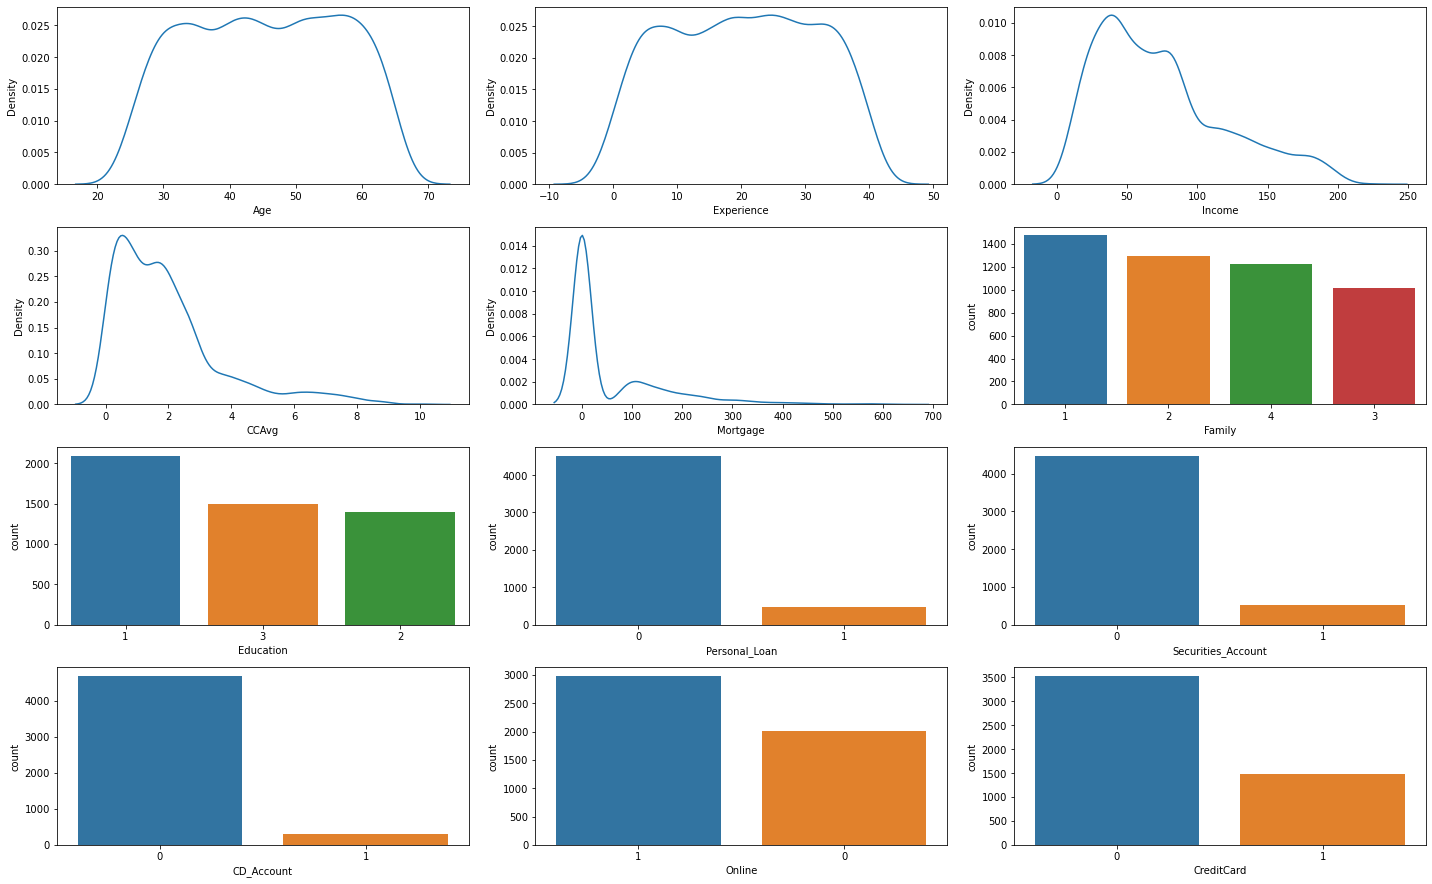

In [13]:
# Lets look at each of the individual data elements
fig, axs = plt.subplots(5,3,figsize=(20,15))
i=0;
j=0;
start = 0;
kdeplotCols = ['Age','Experience','Income','CCAvg','Mortgage']

for colToPlot in colsToplot:
    if colToPlot in kdeplotCols:
        sns.kdeplot(data=lmdf,x=colToPlot,ax=axs[i][j])
    else:
        sns.countplot(data=lmdf,order=lmdf[colToPlot].value_counts().index, x=colToPlot,ax=axs[i][j])
    start = start+1;
    if j < 2:
        j = j+1
    elif j > 1:
        i = i+1
        j = 0
 
for counter in range(start,15):
    fig.delaxes(axs.flatten()[counter])        
plt.tight_layout()

In [14]:
# For the columns of Age, Experience, CCAvg, Income and Mortgage, a Kde Plot it might be important to study the influence of outliers
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="turquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="crest"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

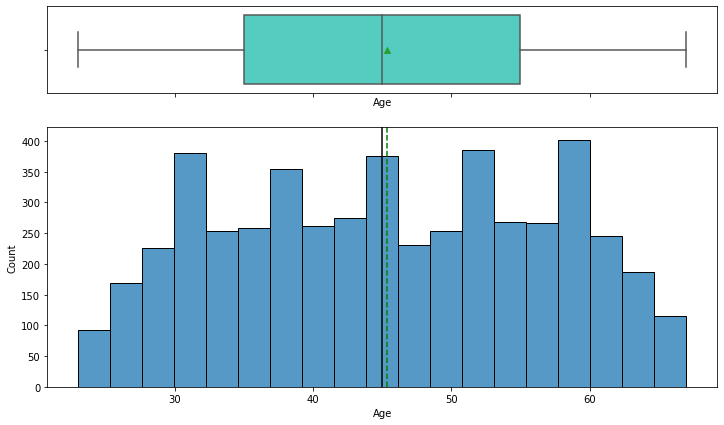

In [15]:
# Lets Start with Age, from the following boxplot, we do not find any significant outliers on Age
histogram_boxplot(lmdf,'Age')

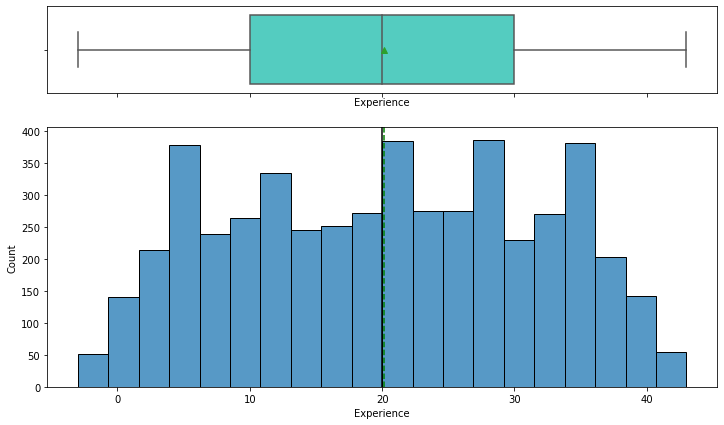

In [16]:
# Lets check Experience, from the following boxplot, we do not find any significant outliers on Experience
histogram_boxplot(lmdf,'Experience')

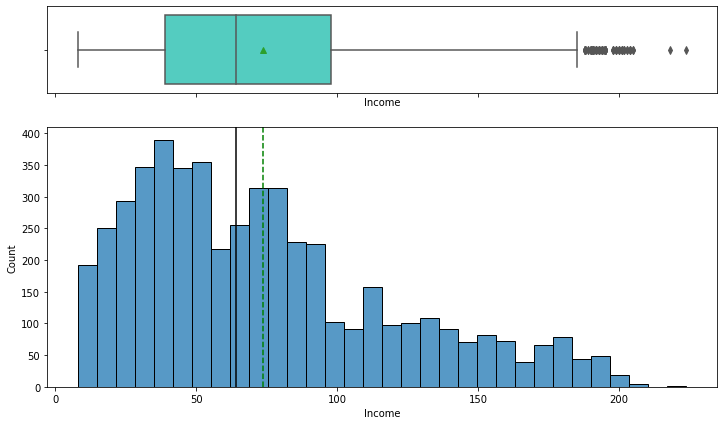

In [17]:
# Lets check Income from the following boxplot, we find any significant outliers on Income greater than 75th Percentile which could be normalised 
histogram_boxplot(lmdf,'Income')

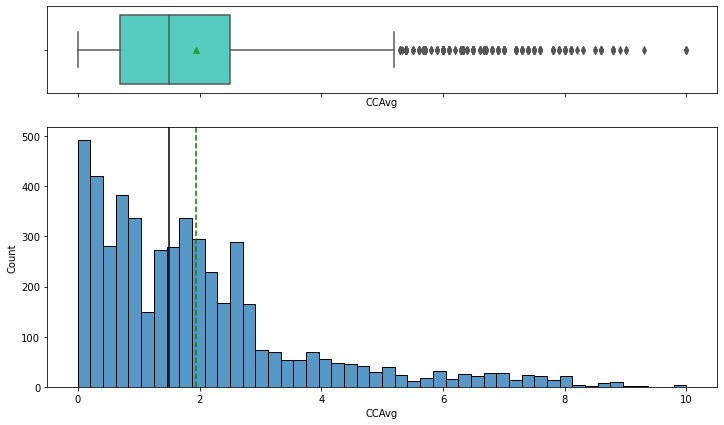

In [18]:
# Lets check CCAvg , we find any significant outliers on CCAvg greater than 75th Percentile which could be normalised 
histogram_boxplot(lmdf,'CCAvg')

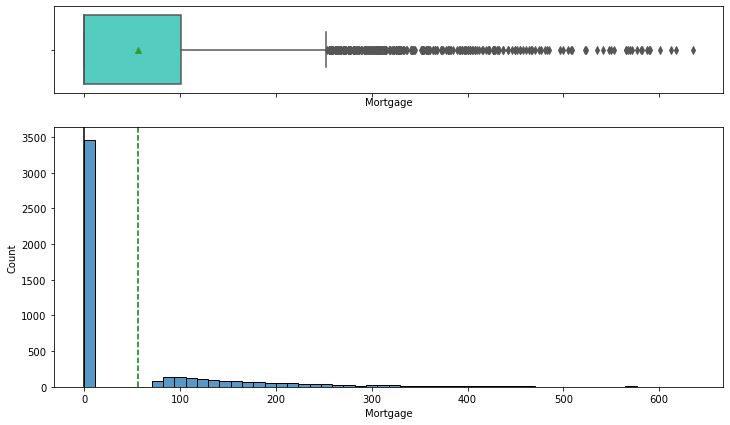

In [19]:
# Lets check Mortgage  we find any significant outliers on Mortgage greater than 75th Percentile which could be normalised 
histogram_boxplot(lmdf,'Mortgage')

### Observations from Univariate Analysis
1. Age is spread between 23 years to 67 years with a mean of 45 years and the 50th percentile at 45 years. It is spread almost equally
2. Years of Professional experience ranges from -3 to 43 years with the mean at 20 years. The negative years of experience might need treatment, but the 25th percentile and 75th percentile on experience is at 10 and 20 respectively
3. Annual Income of the Customer ranges from 8K USD to 225K USD, with the mean at 74K USD. The 75th Percentile is at 94K USD, which means that there is scope for treating the outliers on annual income
4. Zip Code is a geographic marker field with less statistical significance on the data. 
5. Family of Customers indicate that either we have 1 membered families which is the maximum spread, with a mean of 2, and a maximum of 4 persons per Family
6. CCAvg is the average credit card spend and this ranges from 0 USD to upto 10K USD, The 75th Percentile is at 2.5K USD, which essentially indicate a good number of outliers between 75th percentile and maximum. Same with Customers who spend less than the 25th percentile of 700 USD
7. Minimum Education is atleast a Undergraduate level and the maximum is as an Advanced Professional. The Mean education level is atleast at a Graduate Level
8. Morgage value of House has a mean of 56.5 K USD, with the minimum and 50th percentile being 0, and the 75th Percentile to maximum is where folks have a mortgage. This indicates that only 25% customers might have a mortgage
9. Almost upto the 75th Percentile, no customer had Personal Loans, or Less than 25% of the People had accepted a Personal Loan in earlier Campaigns, which indicates that most Customer had never had a Personal Loan which is inline with the Problem Statement defined
10. Almost upto 75th Percentilem, no customer had a securities account, which indicates that most customers are risk averse, and only 25% or lesser customers has availed this facility
11. CD_Account shows similar trends as Personal Loan and Securities Account, which means less than 25% Customers has a Certificate of Deposit Account
12. More than 50% of the Customers are savvy enough to be Online
13. Atleast 25% of the Customers who are greater than the 75th Percentile are having a Credit Card Account with All life Bank 


### Bivariate Analysis

* All the columns in the data type are numeric data types, and it would make it easier to try a pearson's correlation with a HeatMap.
* This could provide us insights on which variables need to be understood more in terms of a relation ship


In [20]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


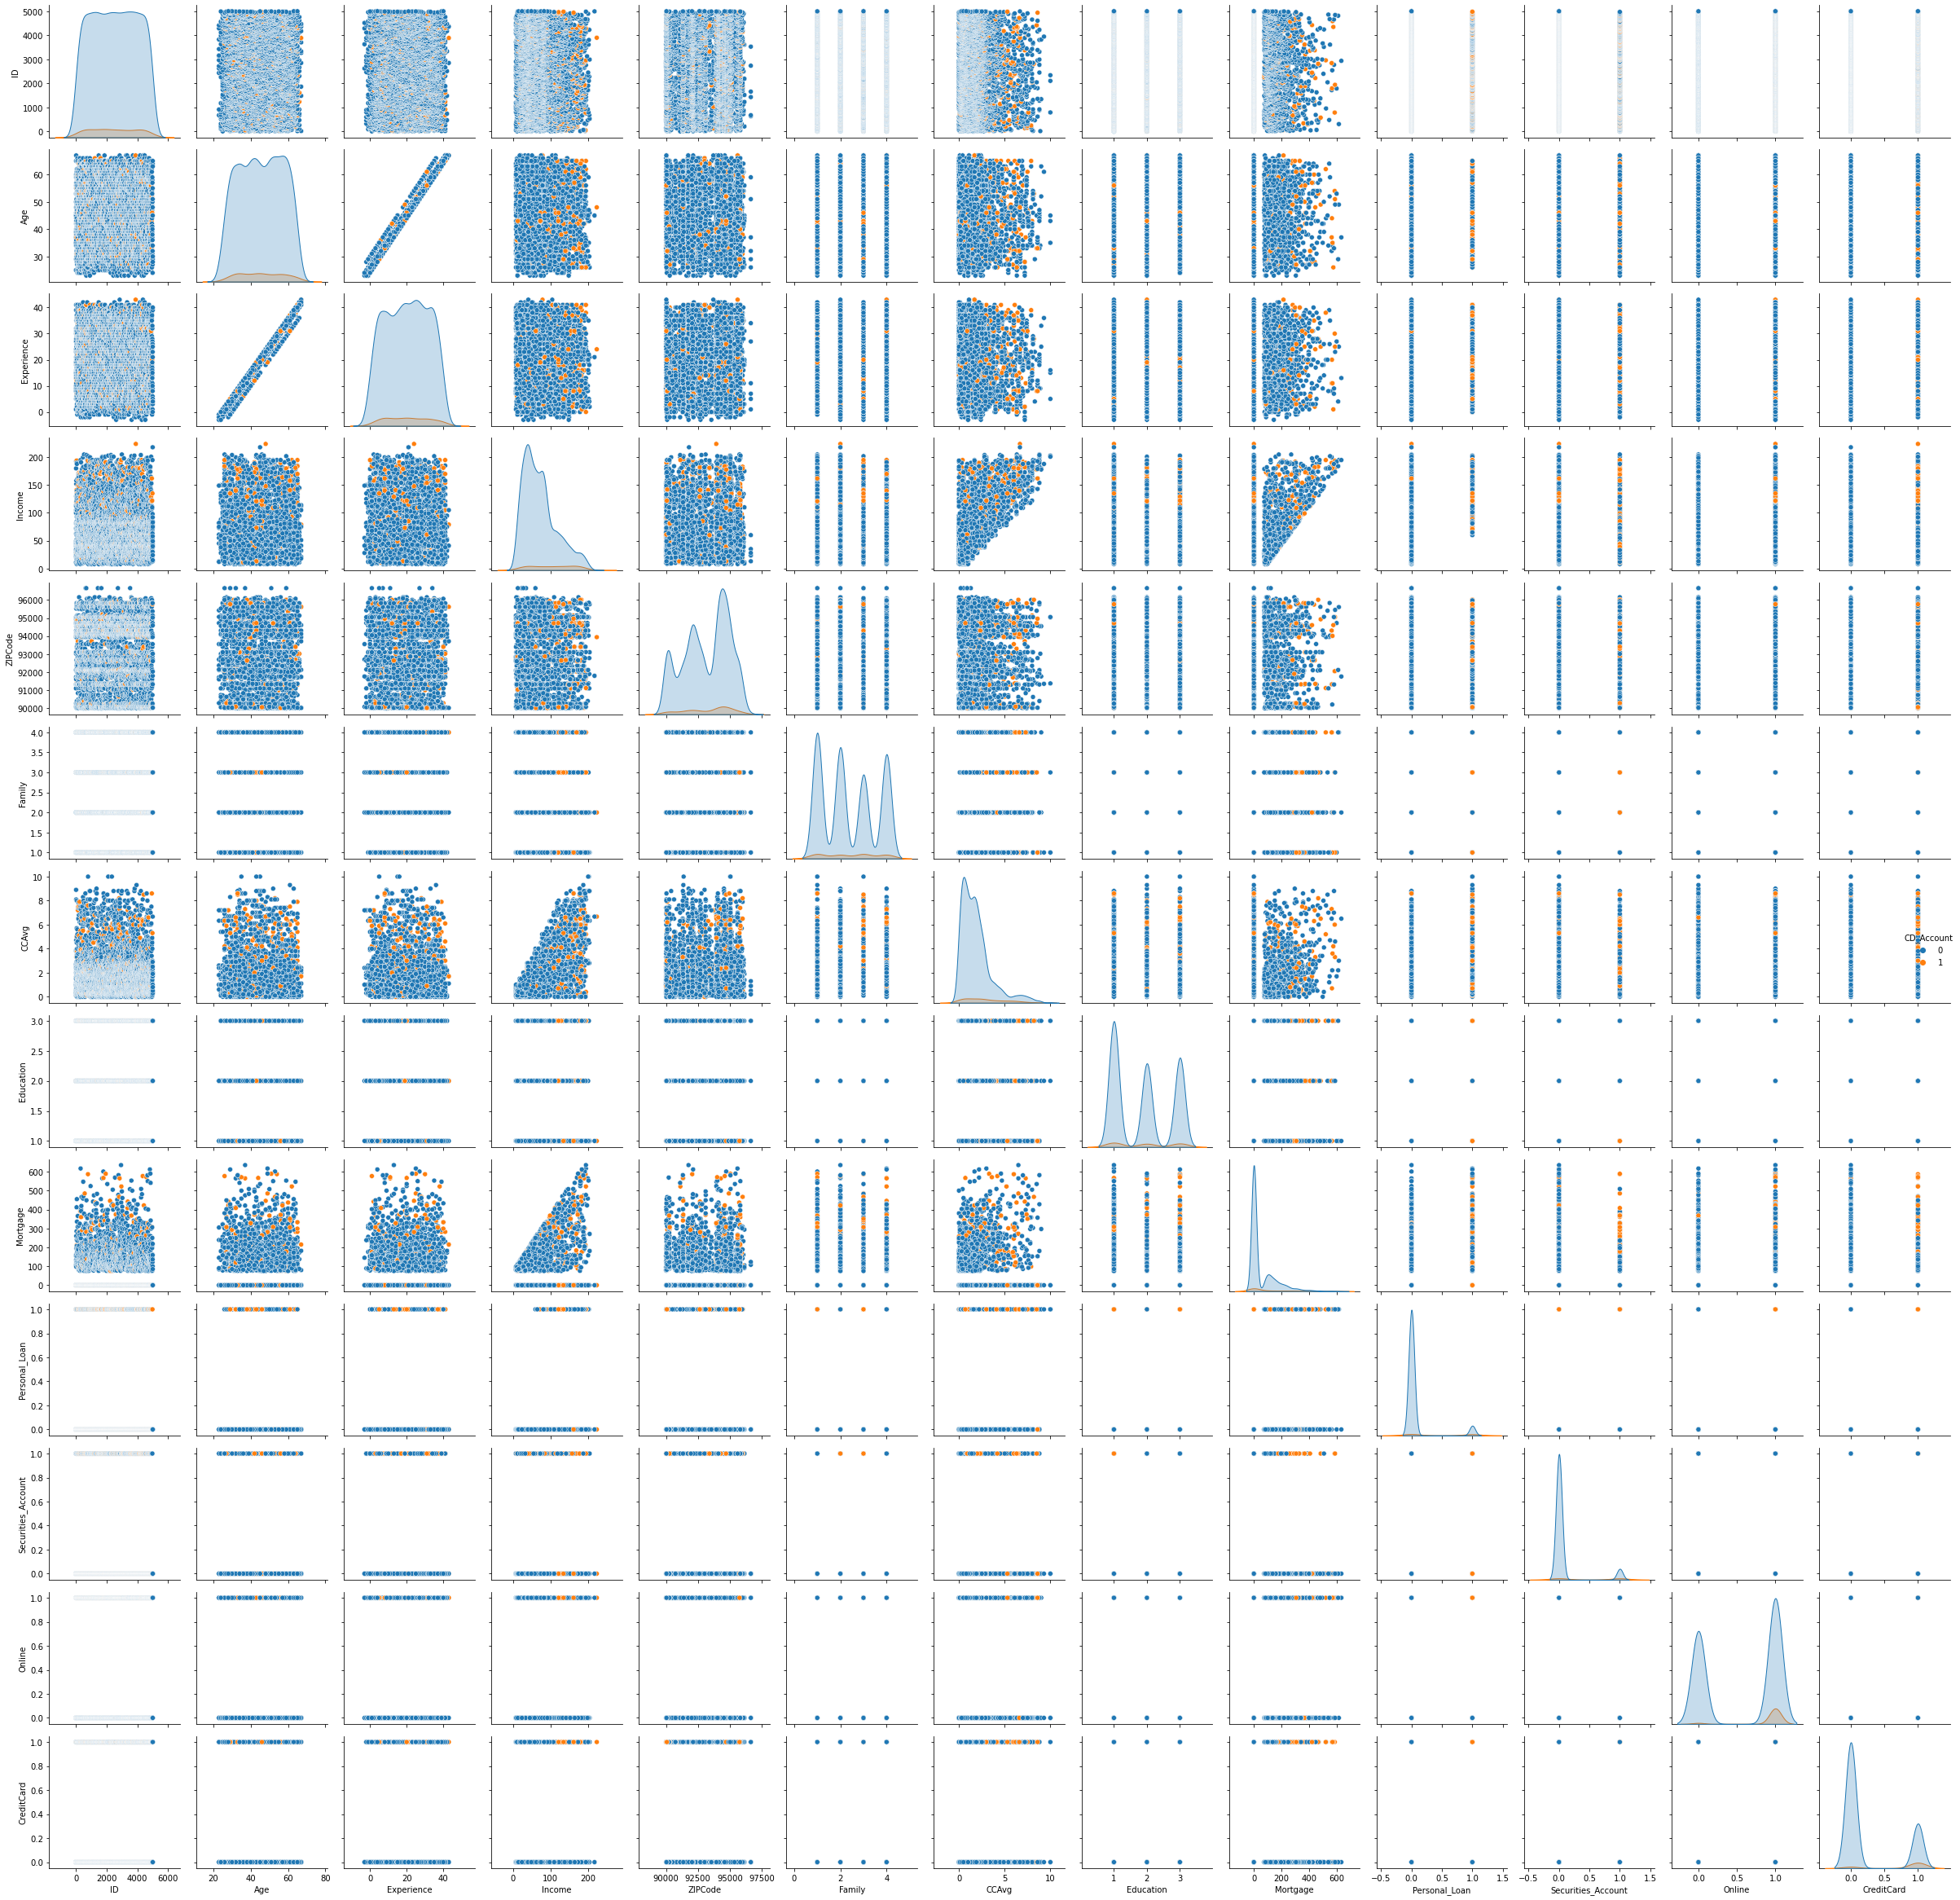

In [21]:
sns.pairplot(data=lmdf,hue='CD_Account')
plt.tight_layout()

<AxesSubplot:>

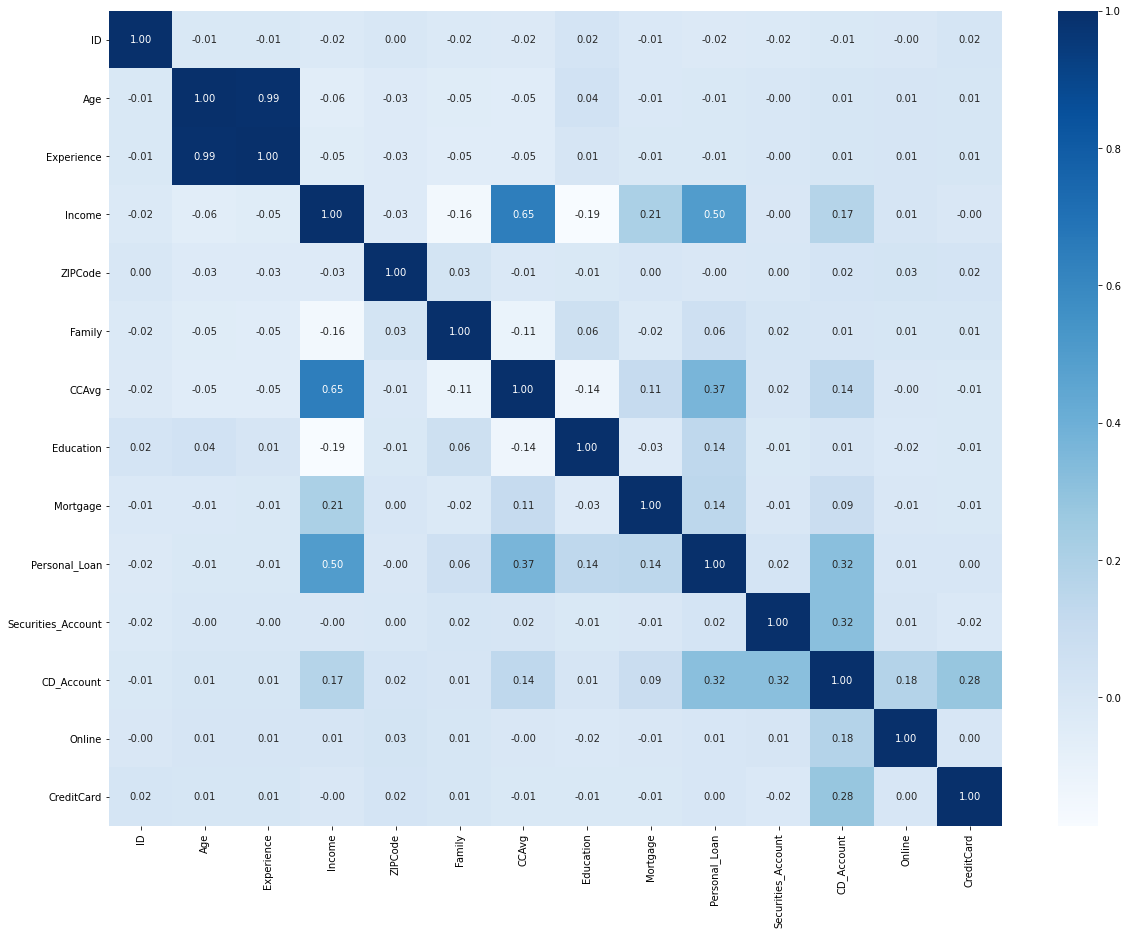

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(data=lmdf.corr(),annot=True,fmt='0.2f',cmap='Blues')

### Observations from Heatmap 
1. There is a very strong postive correlation between Age and Experience
2. There is a strong postive correlation between CCAvg and Income of the Customer
3. Mortage and CD_Account of a customer is showing a slight positive correlation with income
4. Education has a slight negative correlation with Income
5. Income and CD_Account shows a positive correlation with Personal Loan
6. CCAvg shows a slightly positive correlation with Personal Loan
7. Education & Mortagage show a very slight positive correlation with Personal Loan

<Figure size 864x1152 with 0 Axes>

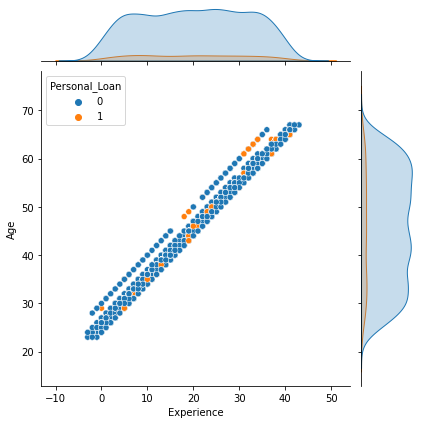

In [23]:
# Lets do a Join Plot between the variables in heatmap
plt.figure(figsize=(12, 16))
sns.jointplot(x='Experience',y='Age',hue='Personal_Loan',data=lmdf)

<Figure size 864x1152 with 0 Axes>

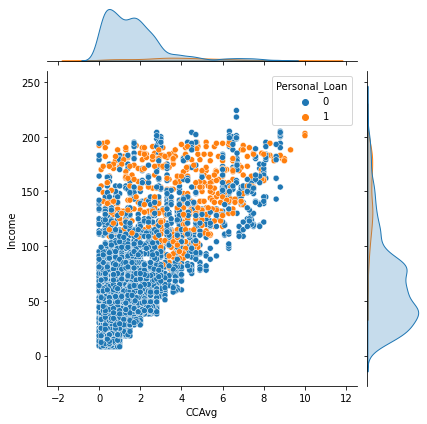

In [24]:
# Lets do a Join Plot between the variables in heatmap
plt.figure(figsize=(12, 16))
sns.jointplot(x='CCAvg',y='Income',hue='Personal_Loan',data=lmdf)

<Figure size 864x1152 with 0 Axes>

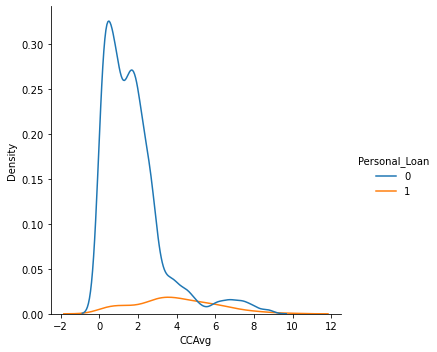

In [25]:
plt.figure(figsize=(12, 16))
sns.displot(x='CCAvg',hue='Personal_Loan',data=lmdf,kind='kde')

<Figure size 864x1152 with 0 Axes>

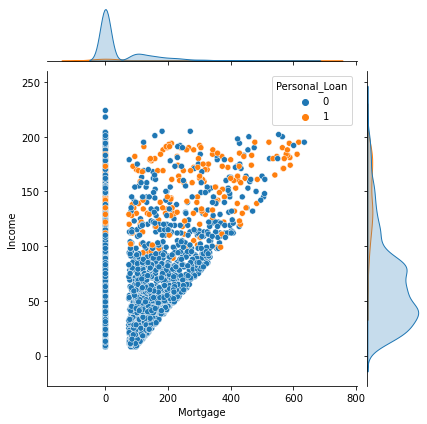

In [26]:
plt.figure(figsize=(12, 16))
sns.jointplot(x='Mortgage',y='Income',hue='Personal_Loan',data=lmdf)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

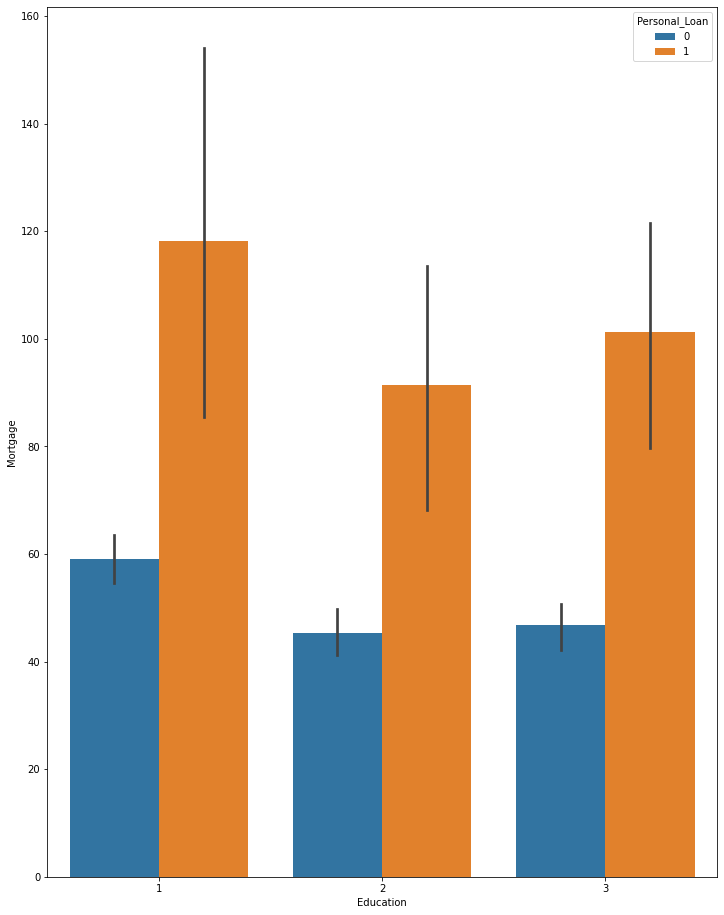

In [27]:
plt.figure(figsize=(12, 16))
sns.barplot(x='Education',y='Mortgage',hue='Personal_Loan',data=lmdf)

<AxesSubplot:xlabel='Education', ylabel='Income'>

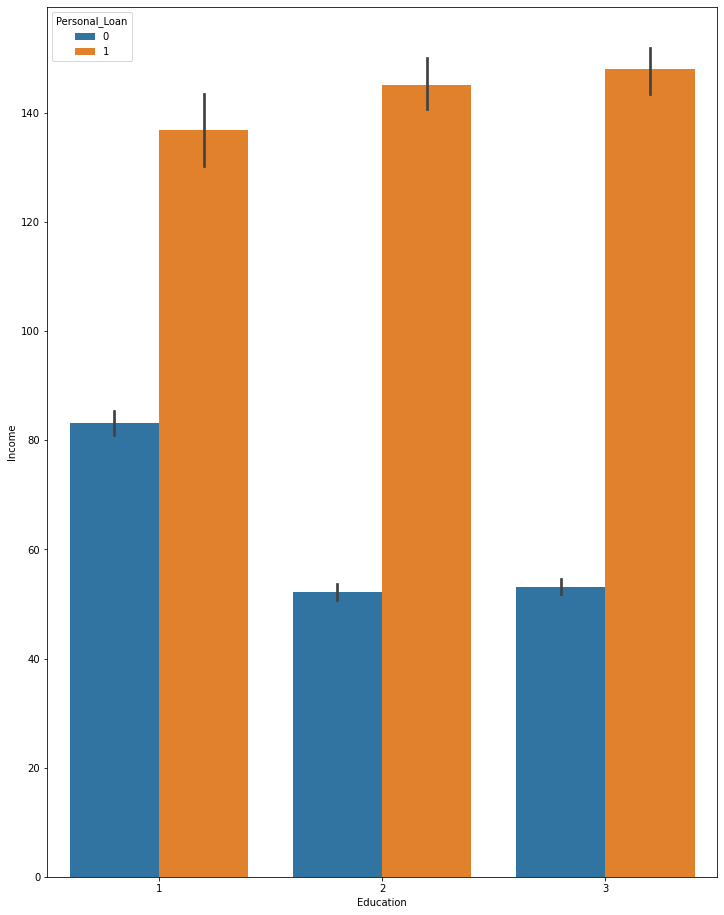

In [28]:
# Lets do a Join Plot between the variables in heatmap
plt.figure(figsize=(12, 16))
sns.barplot(x='Education',y='Income',hue='Personal_Loan',data=lmdf)

### Illustrate the insights based on EDA


### Observations from Exploratory Data Analysis
1. With more experience, and age, people taking personal loan follows a positive correlation between the 2 variables
2. People with higher income have a higher possibility of taking a personal loan
3. People with higher CCAvg have a higher possibility of taking a personal loan
4. People with higher income have a higher possibility of taking a personal loan and when they have a Mortgage, the more the Morgage, the more chances of them taking a personal loan
5. Undergraduates with a higher Mortgage take personal loans more than any other categories, and this trend is evident in folks with an advanced education as well
6. People wtih Advanced Education with a higher Income take personal loans more than any other categories, and this trend is decreasing with lesser education, but folks with more income tend to take Personal Loans

### Data Pre-processing

In [29]:
# The ID Column is having no statisitical relevance and the same can be removed
lmdf.drop('ID',axis=1,inplace=True)

In [30]:
# Amongst all the data, the experience data has negative values and zeros, and will require to be treated to the minimum value
minvalidExp = lmdf[lmdf['Experience'] > 1]
#type(minvalidExp)
minExp = minvalidExp['Experience'].min()
lmdf['Experience'] = lmdf['Experience'].apply(lambda x : minExp if x < 1 else x)

In [31]:
lmdf.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.166800    11.361214      1.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [32]:
## Next we need to treat the outliers with Income, CCAvg and Mortgage
## This Method will adjust the Outliers data points to be within the Lower_Whisker and Upper_Whisker of IQR Range
def treat_outliers(df,col):
    """
    df:dataframe
    col:dataframe column
    """
    Q1=df[col].quantile(0.25) #25th Quantile
    Q3=df[col].quantile(0.75) #75th Quantile
    
    IQR = Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(f'For column {col} Lower Whisker={Lower_Whisker} Upper_Whisker={Upper_Whisker}')
    df[col] = np.clip(df[col],Lower_Whisker,Upper_Whisker)
    
    return df

# Based on Box Plots from Univariate Analysis we have the columns Income, CCAvg and Mortgage Identified to have Outliers
lmdf = treat_outliers(lmdf,'Income')
lmdf = treat_outliers(lmdf,'CCAvg')
lmdf = treat_outliers(lmdf,'Mortgage')

For column Income Lower Whisker=-49.5 Upper_Whisker=186.5
For column CCAvg Lower Whisker=-2.0 Upper_Whisker=5.2
For column Mortgage Lower Whisker=-151.5 Upper_Whisker=252.5


In [33]:
# Lets Relook at the statistical output of the different columns
lmdf.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.166800    11.361214      1.0     10.0   
Income              5000.0     73.617400    45.626122      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.831338     1.452215      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     50.494700    83.005401      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    186.5  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5      5.2  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    252.5  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [34]:
# Age & Experience were highly correlated and one of them could be removed

# Create a Correlation Matrix with the Dataframe
cor_matrix = lmdf.corr().abs()

# Select the Upper Triangle of the Correlation Matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# Indentify Strongly Correlated Column that could be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Experience is Strongly correlated to Age and will be dropped
lmdf_n = lmdf.drop(lmdf[to_drop], axis=1)



In [35]:
### Lets transform the variables of Family & Education into more meaningful variables

replaceStruct = {
    'Family' : {1:'Single',2:'Couple', 3: 'Single Child', 4: 'Two Children'},
    'Education' : {1: 'Undergrad', 2: 'Graduate' , 3: 'Advanced/Professional'},
}

lmdf_n = lmdf_n.replace(replaceStruct)
lmdf_n.head()

Age  Income  ZIPCode        Family  CCAvg  Education  Mortgage  \
0   25    49.0    91107  Two Children    1.6  Undergrad       0.0   
1   45    34.0    90089  Single Child    1.5  Undergrad       0.0   
2   39    11.0    94720        Single    1.0  Undergrad       0.0   
3   35   100.0    94112        Single    2.7   Graduate       0.0   
4   35    45.0    91330  Two Children    1.0   Graduate       0.0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  
0       Pasadena  
1    Los Angeles  
2       Berkeley  
3  San Francisco  
4     Northridge

In [36]:
lmdf_f = pd.get_dummies(lmdf_n['Family'],drop_first=False)
lmdf_e = pd.get_dummies(lmdf_n['Education'],drop_first=False)

lmdf_n = pd.merge(lmdf_n,lmdf_f,left_index=True,right_index=True)
lmdf_n = pd.merge(lmdf_n,lmdf_e,left_index=True,right_index=True)

lmdf_n.head()

Age  Income  ZIPCode        Family  CCAvg  Education  Mortgage  \
0   25    49.0    91107  Two Children    1.6  Undergrad       0.0   
1   45    34.0    90089  Single Child    1.5  Undergrad       0.0   
2   39    11.0    94720        Single    1.0  Undergrad       0.0   
3   35   100.0    94112        Single    2.7   Graduate       0.0   
4   35    45.0    91330  Two Children    1.0   Graduate       0.0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  Couple  Single  Single Child  Two Children  \
0       Pasadena       0       0             0             1   
1    Los Angeles       0       0             1             0   
2       Berkeley       0       1             0             0   
3  San Francisco       0       1             0             0   
4     Northridge       0       0             0             1   

   Advanced/Professional  Graduate  Undergrad  
0                      0         0          1  
1                      0         0          1  
2                      0         0          1  
3                      0         1          0  
4                      0         1          0

<AxesSubplot:>

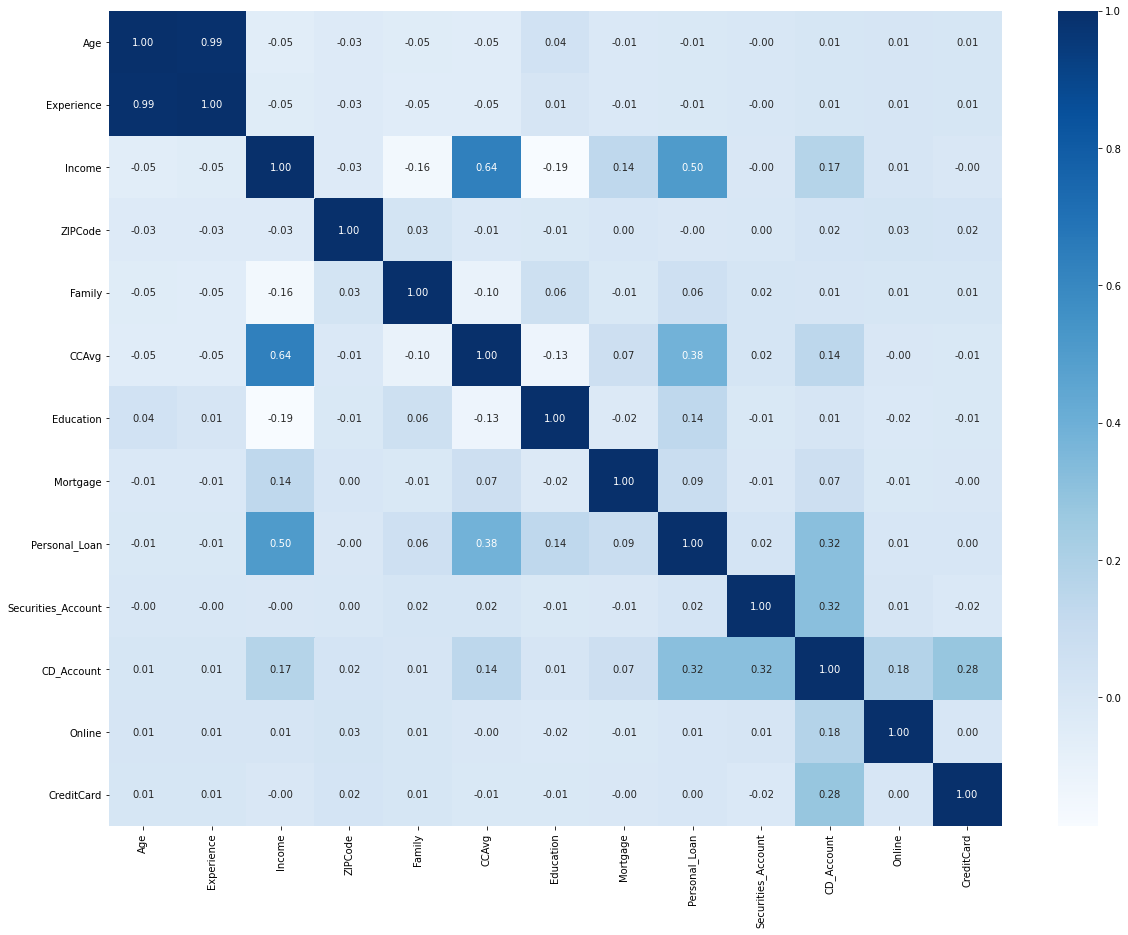

In [37]:
## Lets Relook at the Heat Map for further treatment of variables
plt.figure(figsize=(20,15))
sns.heatmap(lmdf.corr(),annot=True,fmt='0.2f',cmap='Blues')

In [38]:
# The City Column dervied from ZIPCode could be Label encoded
from sklearn.preprocessing import LabelEncoder

labelMe = LabelEncoder()
lmdf_n['City_L'] = labelMe.fit_transform(lmdf_n['City'])

In [39]:
lmdf_n.head()

Age  Income  ZIPCode        Family  CCAvg  Education  Mortgage  \
0   25    49.0    91107  Two Children    1.6  Undergrad       0.0   
1   45    34.0    90089  Single Child    1.5  Undergrad       0.0   
2   39    11.0    94720        Single    1.0  Undergrad       0.0   
3   35   100.0    94112        Single    2.7   Graduate       0.0   
4   35    45.0    91330  Two Children    1.0   Graduate       0.0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

            City  Couple  Single  Single Child  Two Children  \
0       Pasadena       0       0             0             1   
1    Los Angeles       0       0             1             0   
2       Berkeley       0       1             0             0   
3  San Francisco       0       1             0             0   
4     Northridge       0       0             0             1   

   Advanced/Professional  Graduate  Undergrad  City_L  
0                      0         0          1     147  
1                      0         0          1     106  
2                      0         0          1      17  
3                      0         1          0     178  
4                      0         1          0     134

In [40]:
### Let us prepare for data for modelling with a Split of Test and Train data in the ration of 30:70

# Variables X,y will be used for Logistic Regression
X = lmdf_n.drop(['ZIPCode','Personal_Loan','City','City_L','Family','Education'],axis=1)
y = lmdf_n['Personal_Loan']

# Variables XD,yd will be used for Decision Tree
XD = X.copy()
yd = y.copy()


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
XD_train,XD_test,yd_train,yd_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 15)
Shape of test set :  (1500, 15)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### Model building - Logistic Regression

1. Lets Build the Basic model performance measurement required for Logistic Regression, with Prediction Threshold at 0.5
2. We also need to output a confusion matrix to study model performance
3. Then we could invoke the Logistic Regression API and look at Co-efficients

In [42]:
# Lets define the reusable methods to evalaute the model performance, using a threshold parameter
def model_performance_classification_sklearn_with_threshold(model,predictors,target,threshold=0.5):
    """
    function to compute different metrics, based on the threshold specified, to check classification model performance
    
    model:classifier
    predictors:independent variables
    target: dependent variable
    threshold:threshold for classifying the observation as class 1
    """
    
    # predicting using independent variables
    pred_prob = model.predict_proba(predictors)[:,1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)
    
    acc = accuracy_score(target,pred)
    recall = recall_score(target,pred)
    precision = precision_score(target,pred)
    
    f1 = f1_score(target,pred)
    
    df_perf = pd.DataFrame(
    {
        'Accuracy':acc,
        'Recall':recall,
        'Precision':precision,
        'F1':f1,
    }, index=[0],)
    
    return df_perf

In [43]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn

def confusion_matrix_sklearn_with_threshold(model,predictors,target,threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified with percentages
    
    model:classifier
    predictors:independent variables
    target:dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:,1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)
    
    cm = confusion_matrix(target,y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n(0.2%)'.format(item/cm.flatten().sum())]
            for item in cm.flatten()
        ]).reshape(2,2)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=labels,fmt="")
    plt.ylabel("Actual ")
    plt.xlabel("Predicted")

In [44]:
# There are different solvers available in Sklearn Logistic Regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg",random_state=1)

model = lg.fit(X_train,y_train)

In [45]:
# Let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_,lg.intercept_),
    index=X_train.columns.tolist() + ['Intercept'],
    columns=['Coefficients'],)

coef_df.T

Age    Income     CCAvg  Mortgage  Securities_Account  \
Coefficients  0.008341  0.062542  0.495306  0.001247           -0.658651   

              CD_Account    Online  CreditCard    Couple    Single  \
Coefficients    2.916962 -0.473451   -0.737598 -1.016518 -1.047171   

              Single Child  Two Children  Advanced/Professional  Graduate  \
Coefficients      1.469718      0.593973               1.442581  1.220855   

              Undergrad  Intercept  
Coefficients  -2.663434 -10.534128

### Coefficient Interpretations


1. Age, Income, CCAvg, Mortgage, CD Account, Families with Children, Highly educated customers with a Graduate/Advanced Education are positive, which indicates that an increase in any of these values will result in a higher probability of a person taking a personal loan
2. Securities_Account, Being Online, Credit Card, Families with one or two members, people with less undergraduate education etc., are negative which indicates that any increase in values of the parameters could result in decreased probability of a customer getting a personal loan
3. Amongst the Positive Coefficients, CD_Account, Families with Single child, Educated people with Graduation or advanced education are having Coefficients greater than 1 and mean that Alllife bank has a chance of selling Personal Loan products with Customers who have a CD Account or ones who are highly educated

In [46]:
odds = np.exp(lg.coef_[0])

perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

pd.set_option('display.max_columns',None)
pd.DataFrame({'Odds':odds,'Change_odd%':perc_change_odds},index=X_train.columns).T

Age    Income      CCAvg  Mortgage  Securities_Account  \
Odds         1.008376  1.064540   1.641001  1.001248            0.517549   
Change_odd%  0.837616  6.453966  64.100082  0.124802          -48.245085   

              CD_Account     Online  CreditCard     Couple     Single  \
Odds           18.485048   0.622849    0.478262   0.361853   0.350929   
Change_odd%  1748.504837 -37.715113  -52.173846 -63.814717 -64.907097   

             Single Child  Two Children  Advanced/Professional    Graduate  \
Odds             4.348007      1.811170               4.231603    3.390085   
Change_odd%    334.800728     81.117005             323.160304  239.008537   

             Undergrad  
Odds          0.069708  
Change_odd% -93.029159

### Change Odds Interpretations

All the Odds are evaluated by holding rest of the features other than the one evaluated as Constant,

1. Age - 1 unit change in Age will increase the Odds of a person getting personal loan by 0.86 times
2. Income - 1 Unit increase in Income could increase the Odds of a person getting personal loan by 5.6%
3. Mortgage - 1 Unit increase in Morgage could increase the Odds of a person getting personal loan by 0.12%
4. Securities_Account - 0.5 Unit decrease the Odds of a person getting loan by 48 %
5. CD_Account - 18 Unit increase in CD_Account could increase persons getting Personal loan by 1748%
6. Online - 0.6 Unit increase in Online could decrease chances of taking personal loan by 37%
7. Credit Card - 0.5 Unit increase in Credit Card could decrease chances of taking personal loan by 37%
8. Families with 2 Members - 0.36 Unit increase could decrease chances of taking personal loan by 63%
9. Families with Single Member - 0.35 Unit increase could decrease chances of taking personal loan by 64%
10. Familes with Single Child - 4.3 Unit increase could increase chances of taking personal loan by 334%
11. Families with Two Children - 1.8 Unit increase could increase chances of taking personal loan by 81%
12. Educated Professionals with Advanced Degrees - 4 Unit increase could increase chances of taking personal loan by 323%
13. Graduate Educated People - 3 Unit increase could increase chances of taking personal loan by 239%
14. Undergraduate Educated People - 0.07 Unit decrease could decrease chances of taking personal loan by 93%


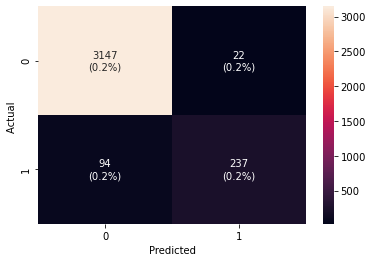

In [47]:
# Confusion Matrix with Threshold of 0.5 for Training Data
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [48]:
# Model Performance with Threshold of 0.5 for Training Data

log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg,X_train,y_train
)

print("Training set performance:")
log_reg_model_train_perf



Training set performance:


Accuracy    Recall  Precision       F1
0  0.966857  0.716012   0.915058  0.80339

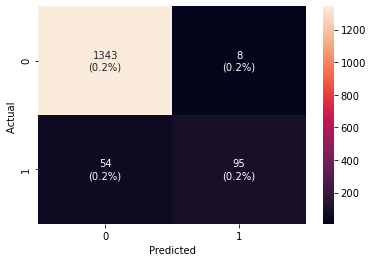

In [49]:
# Confusion Matrix with Threshold of 0.5 for Training Data
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [50]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)
print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.958667  0.637584    0.92233  0.753968

### Model performance evaluation and improvement

1. The Basic Model involving Logistic Classifer returns an Accuracy of 95%, with Re-call Score of 64%, Precision of 92% and F1 Score of 75%. 
2. Amongst the Metrics for Model Performance evaluation, The Primary Interest of All Life Bank is to find out the following,
    2.1 To predict whether a liability customer will buy a personal loan or not.
    2.2 Which variables are most significant.
    2.3 Which segment of customers should be targeted more
    
While choosing the Metrics, it is important to reliably understand, target customers with a highest possibility of getting a personal loan. 

In in this perspective, the Ability to Correctly Predict the Personal Loan customer is provided by the Metric of Precision, which is the ratio between the True Positive vs True Positive + False Positive, with emphasis on a number of lower False Positives. This could help All Life Bank focus on Customers who could be potentially converted into Personal Loan Customers.

Recall(True Positive to Tru Positive + False Negative) could be a worthy metric, if the All Life Bank will be interested in finding all those Customers who could be a potential Customers whether the Customer actually gets a Personal Loan or not is important, it widens the Net, in terms of identifying the target Customers.

The F1 Score could be a good balance of both Precision and Recall. It is recomended for the Bank to focus on the Select Customers who would be genuinely Interested in taking a personal loan.

And Hence it is Concluded that the Model that has the Highest F1 Score should be considered the Best Model

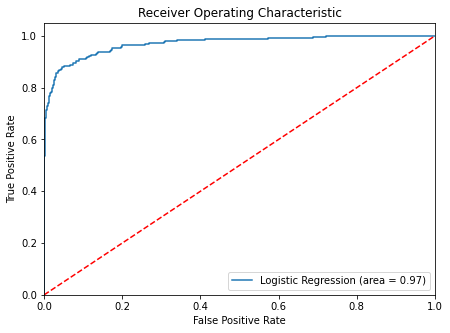

In [51]:
# Lets look at the Receiver Operating Characterics(ROC) Area Under the Curve for Training Data
logit_roc_auc_train = roc_auc_score(y_train,lg.predict_proba(X_train)[:,1])
fpr,tpr,thresholds = roc_curve(y_train,lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

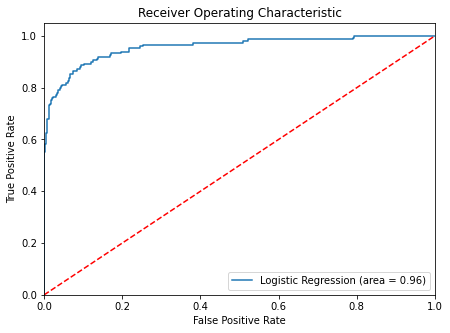

In [52]:
# Lets look at the Receiver Operating Characterics(ROC) Area Under the Curve for Test Data

logit_roc_auc_test = roc_auc_score(y_test,lg.predict_proba(X_test)[:,1])
fpr,tpr,thresholds = roc_curve(y_test,lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [53]:
fpr,tpr, thresholds = roc_curve(y_train,lg.predict_proba(X_train)[:,1])

optimal_idx = np.argmax(tpr-fpr)

optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.18205302375858967


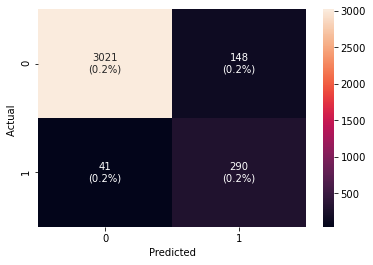

In [54]:
# We see the Optimal Threshold AUC/ROC to be 0.18, Lets use thie value for evaluating model performance

# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [55]:
# By Using the Optimum Threshold, lets evaluate the Training Performance

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0     0.946  0.876133     0.6621  0.754226

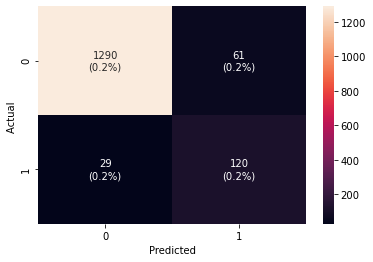

In [56]:
# creating confusion matrix for the Training Performance
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [57]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0      0.94  0.805369   0.662983  0.727273

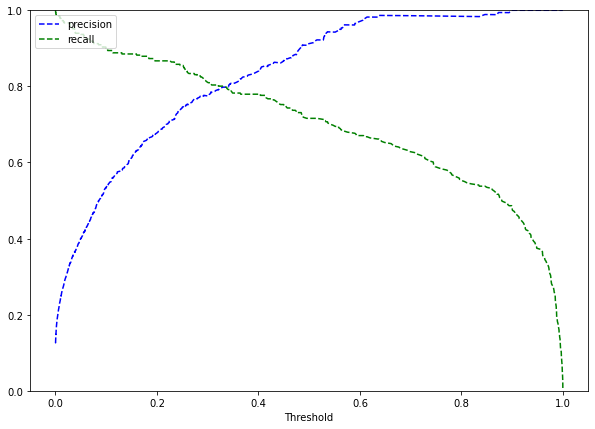

In [58]:
# Lets evaluate the Thresholds for Precision and Recall and look at a Balanced F1 Score

y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [59]:
# setting the threshold
optimal_threshold_curve = 0.33

In [60]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0     0.962  0.800604   0.798193  0.799397

In [61]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision        F1
0      0.96  0.738255   0.839695  0.785714

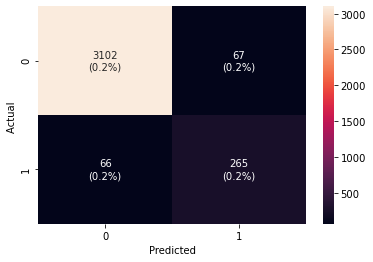

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

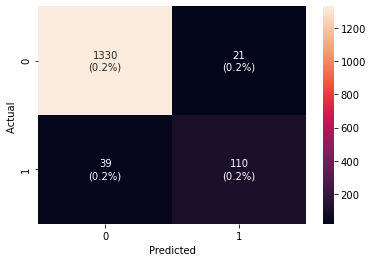

In [63]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

### Compared to the basic Model on linear regression and the one optimised for F1 Score, we find the one Optimised through ROC/AUC returning a better F1 Score

In [64]:
### Now, Lets explore Model Performance Improvement with Sequential Feature Selector

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [65]:
X.shape

(5000, 15)

In [66]:
sfs = SFS(
    model,
    k_features=15,
    forward=True,
    floating=False,
    scoring='f1',
    verbose=2,
    cv=3,
    n_jobs=-1)

sfs = sfs.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    6.3s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.3s finished

[2021-08-03 09:44:27] Features: 1/15 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2021-08-03 09:44:27] Features: 2/15 -- score: 0.7276924600816197[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2021-08-03 09:44:28] Features: 3/15 -- score: 0.7711761706064694[Parallel(n_jobs=-1)]: Using back

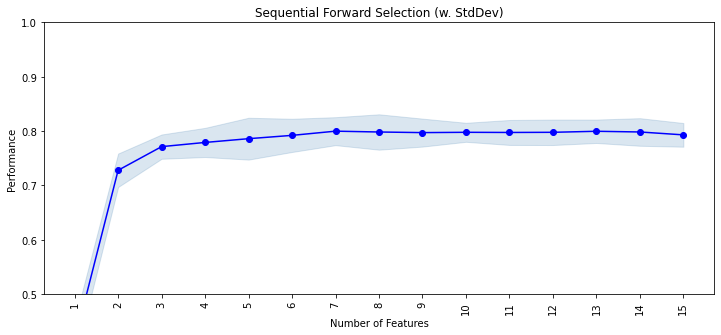

In [67]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.5, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2021-08-03 09:44:31] Features: 1/7 -- score: 0.41343889085824576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2021-08-03 09:44:31] Features: 2/7 -- score: 0.7276924600816197[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2021-08-03 09:44:31] Features: 3/7 -- score: 0.7711761706064694[Parallel(n_jobs=-1)]: Using backend

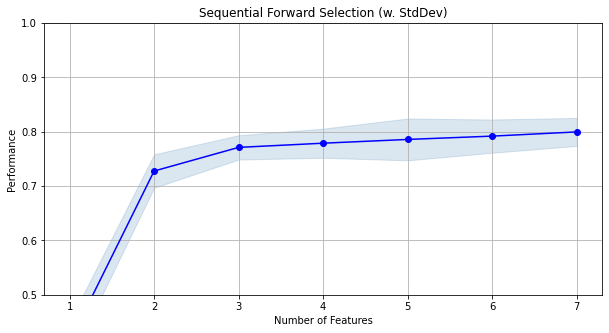

In [68]:
# We see that the Model Performance is at its peak at 7 Features, Lets re-iterate the Sequential Feature Selector with 7 Features
sfs1 = SFS(
    model,
    k_features=7,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.ylim([0.5, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [69]:
# We see the peak performance at 7 Featuers
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 4, 5, 7, 10, 12, 14]


In [70]:
X_train_final = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [71]:
# Fitting logistic regession model

logreg = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=0
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

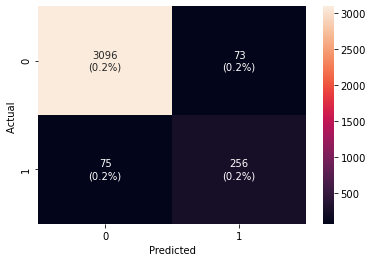

In [72]:
# Lets Re-iterate the Confusion Matrix with revised features and Optimal Threshold
confusion_matrix_sklearn_with_threshold(logreg, X_train_final, y_train,threshold=optimal_threshold_curve)

In [73]:
# Lets Re-iterate the Confusion Matrix with revised features and Optimal Threshold
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_train_final, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


Accuracy    Recall  Precision        F1
0  0.967429  0.700906   0.939271  0.802768

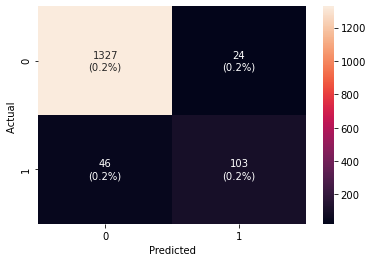

In [74]:
confusion_matrix_sklearn_with_threshold(logreg, X_test_final, y_test,threshold=optimal_threshold_curve)

In [75]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_test_final, y_test,threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


Accuracy    Recall  Precision        F1
0  0.953333  0.691275   0.811024  0.746377

In [76]:
# Lets Compare all the Models Built so far with Logistic Regression

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.18 Threshold",
    "Logistic Regression-0.34 Threshold",
    "log_reg_model_test_perf_SFS - 0.34 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df


Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.18 Threshold  \
Accuracy                      0.958667                            0.940000   
Recall                        0.637584                            0.805369   
Precision                     0.922330                            0.662983   
F1                            0.753968                            0.727273   

           Logistic Regression-0.34 Threshold  \
Accuracy                             0.960000   
Recall                               0.738255   
Precision                            0.839695   
F1                                   0.785714   

           log_reg_model_test_perf_SFS - 0.34 Threshold  
Accuracy                                       0.953333  
Recall                                         0.691275  
Precision                                      0.811024  
F1                                             0.746377

### Model building - Decision Tree

In [77]:
# Lets Instantiate Default Classifier for Decision Tree

#The Copy of X_train,X_test,y_train,y_test will be used to avoid seperation of variables between the 2 algonirthms
#XD_train,XD_test,yd_train,yd_test

dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(XD_train,yd_train)

DecisionTreeClassifier(random_state=1)

In [78]:
print(dTree.score(XD_train,yd_train))
print(dTree.score(XD_test,yd_test))

1.0
0.9766666666666667


In [79]:
def make_confusion_matrix(model, XParam, yparam, labels=[1, 0]):
    y_predict = model.predict(XParam)
    cm = confusion_matrix(yparam, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = [
        "{0:0.2%}".format(value) for value in cm.flatten() / np.sum(cm)
    ]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [80]:
# Lets define the reusable methods to evalaute the model performance, using a threshold parameter
def model_performance(model,predictors,target):
    """
    function to compute different metrics, based on the threshold specified, to check classification model performance
    
    model:classifier
    predictors:independent variables
    target: dependent variable
    threshold:threshold for classifying the observation as class 1
    """
    
    # predicting using independent variables    
    pred = model.predict(predictors)
    
    acc = accuracy_score(target,pred)
    recall = recall_score(target,pred)
    precision = precision_score(target,pred)
    
    f1 = f1_score(target,pred)
    
    df_perf = pd.DataFrame(
    {
        'Accuracy':acc,
        'Recall':recall,
        'Precision':precision,
        'F1':f1,
    }, index=[0],)
    
    return df_perf

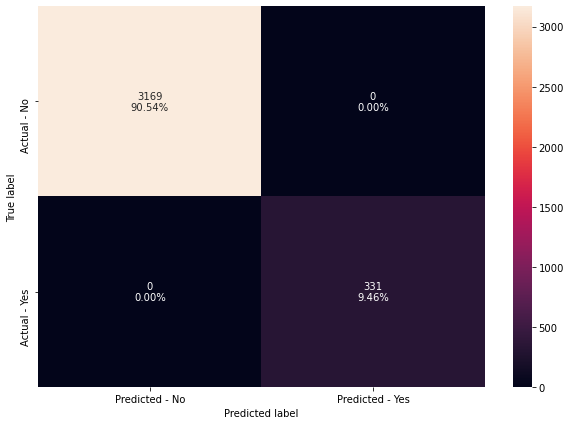

In [81]:
make_confusion_matrix(dTree, XD_train, yd_train)

In [82]:
decision_tree_perf_train = model_performance(
    dTree, XD_train, yd_train
)
print("Training performance:")
decision_tree_perf_train



Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

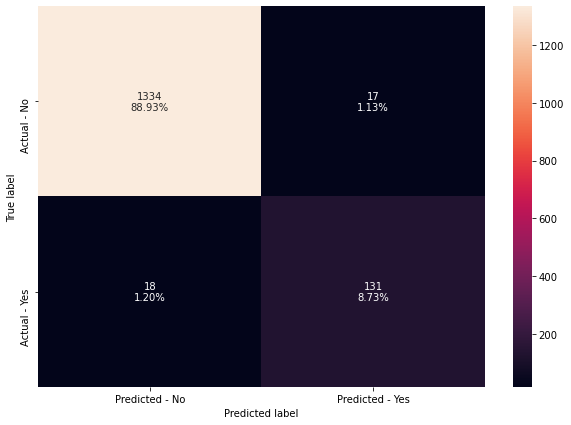

In [83]:
make_confusion_matrix(dTree, XD_test, yd_test)

In [84]:
decision_tree_perf_test = model_performance(
    dTree, XD_test, yd_test
)
#XD_train,XD_test,yd_train,yd_test
print("Test performance:")
decision_tree_perf_test

Test performance:


Accuracy    Recall  Precision        F1
0  0.976667  0.879195   0.885135  0.882155

In [85]:
# Summarising the Performance so far,

log_reg_model_test_perf_threshold_auc_roc

log_reg_model_test_perf

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
        decision_tree_perf_test.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.18 Threshold",
    "Logistic Regression-0.34 Threshold",
    "log_reg_model_test_perf_SFS - 0.34 Threshold",
    "Decision Tree Classifier"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.18 Threshold  \
Accuracy                      0.958667                            0.940000   
Recall                        0.637584                            0.805369   
Precision                     0.922330                            0.662983   
F1                            0.753968                            0.727273   

           Logistic Regression-0.34 Threshold  \
Accuracy                             0.960000   
Recall                               0.738255   
Precision                            0.839695   
F1                                   0.785714   

           log_reg_model_test_perf_SFS - 0.34 Threshold  \
Accuracy                                       0.953333   
Recall                                         0.691275   
Precision                                      0.811024   
F1                                             0.746377   

           Decision Tree Classifier  
Accuracy                   0.976667  
Recall                     0.879195  
Precision                  0.885135  
F1                         0.882155

### Model performance evaluation and improvement


### The Default Decision Tree has returned better Model Performance Characteristics Compared with all Iterations of Logical Regression

Lets Compare the Metrics only from the Best Performing Models moving forward, they are,

<li>Logistic Regression through ROC Curve/AUC based Optimal Threshold</li>
<li>Decision Tree Classifier</li>


The Decision Tree could be improved using both Pre and Post Pruning Techniques, Let us evaluate the decision trees that are a result of Pre and Post pruning

<b>Pre-Pruning</b>

In [86]:
column_names = list(XD.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Couple', 'Single', 'Single Child', 'Two Children', 'Advanced/Professional', 'Graduate', 'Undergrad']


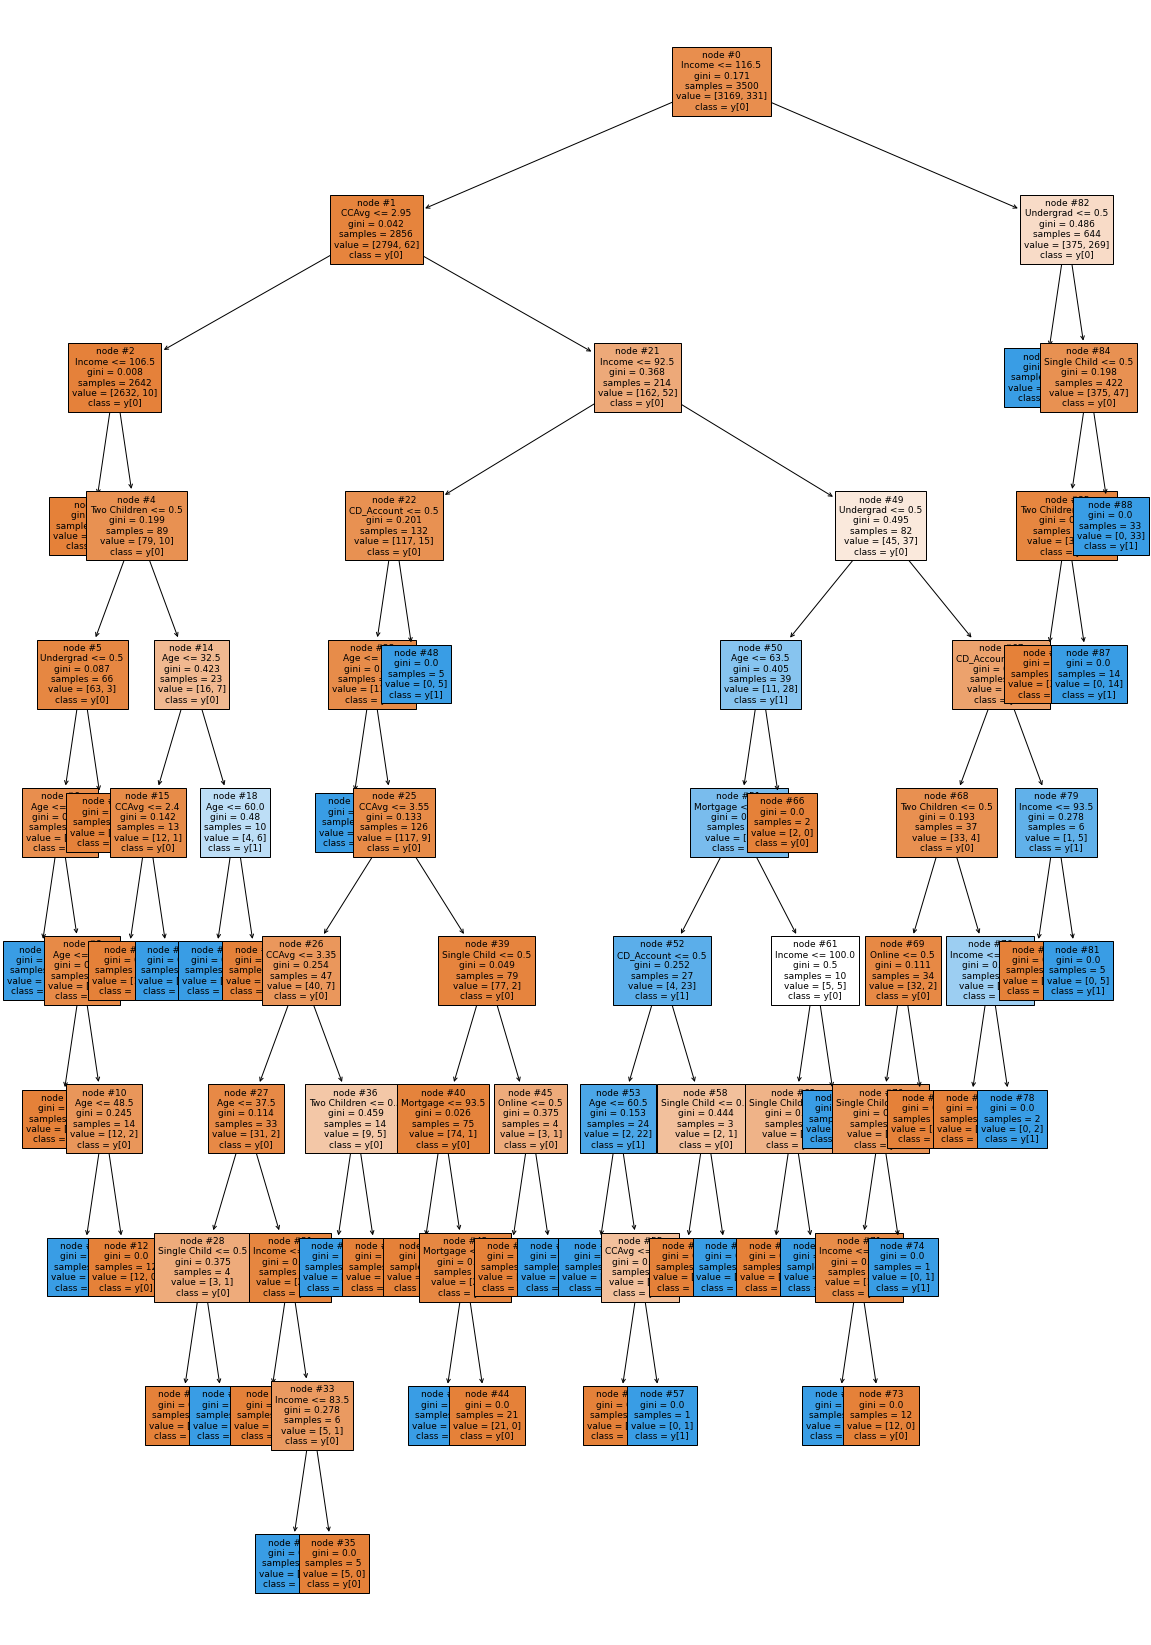

In [87]:
from sklearn import tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

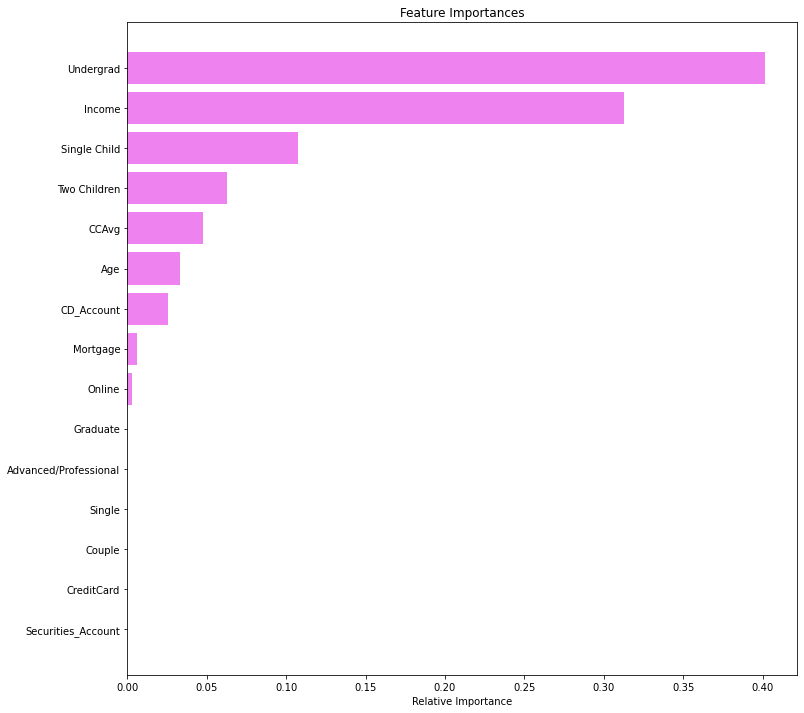

In [88]:
# Lets look at the Features contributing to Model Performance
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [89]:
# Lets do Hyperparameter turning with GridSearch
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(1, 10, 1), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(XD_train, yd_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(XD_train, yd_train)

DecisionTreeClassifier(min_impurity_decrease=0.0001, random_state=1)

In [90]:
decision_tree_tune_perf_train = model_performance(
    estimator, XD_train, yd_train
)
print("Train performance comparison:")
decision_tree_tune_perf_train

Train performance comparison:


Accuracy    Recall  Precision        F1
0  0.997714  0.975831        1.0  0.987768

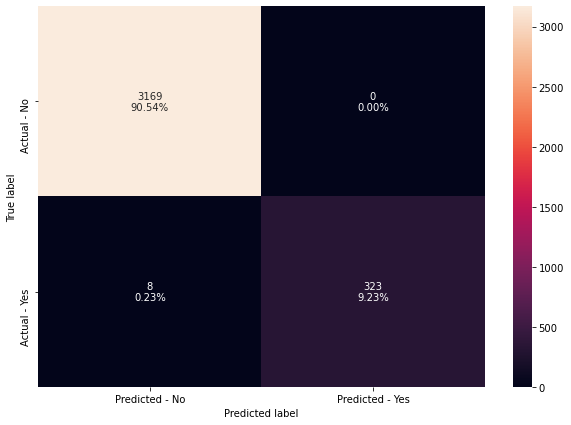

In [91]:
make_confusion_matrix(estimator, XD_train, yd_train)

In [92]:
decision_tree_tune_perf_test = model_performance(
    estimator, XD_test, yd_test
)
print("Test performance comparison:")
decision_tree_tune_perf_test

Test performance comparison:


Accuracy    Recall  Precision        F1
0  0.981333  0.879195   0.929078  0.903448

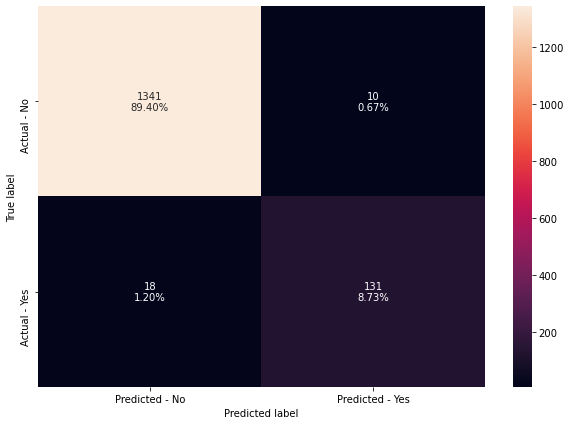

In [93]:
make_confusion_matrix(estimator, XD_test, yd_test)

### Inference
<li> We see that all 3 Metrics vis a vis Recall,Precision and F1 Score has improved with Pre-Pruning and Hyperparameter turning with Grid Search </li>
<li> The Model Depth has decreased, though it appears to be have become more Complex in this process

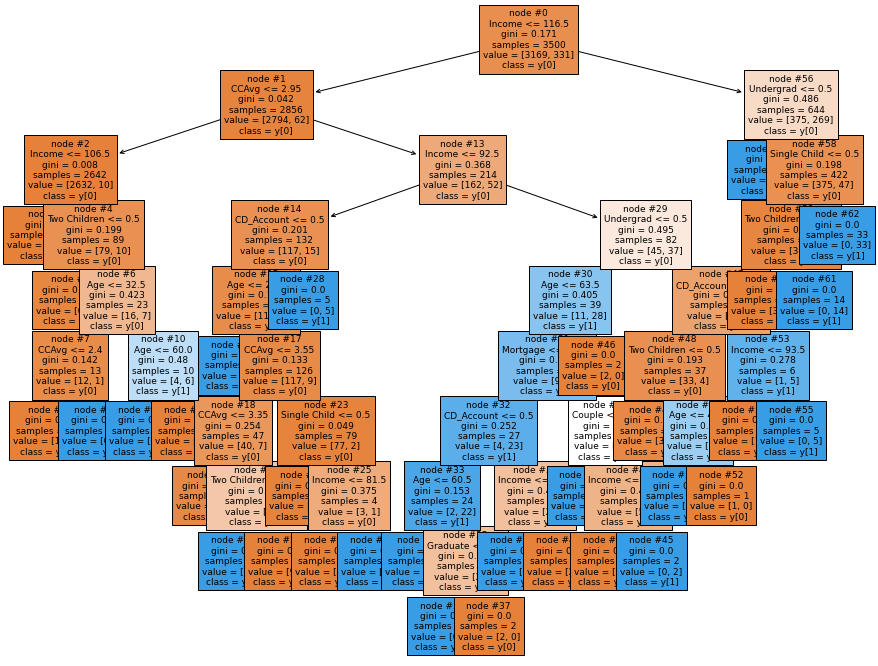

In [94]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

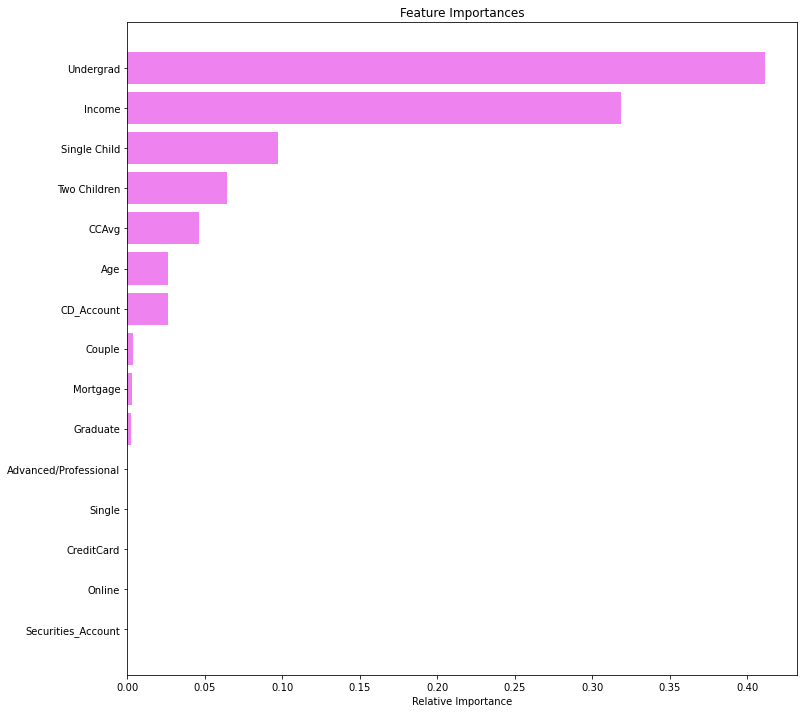

In [95]:
# Lets look at the Features contributing to Model Performance
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Further attempting to evaluate Model performance with Post Pruning

<b> Cost Complexity Pruning/Post Pruning</b>

In [96]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(XD_train, yd_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

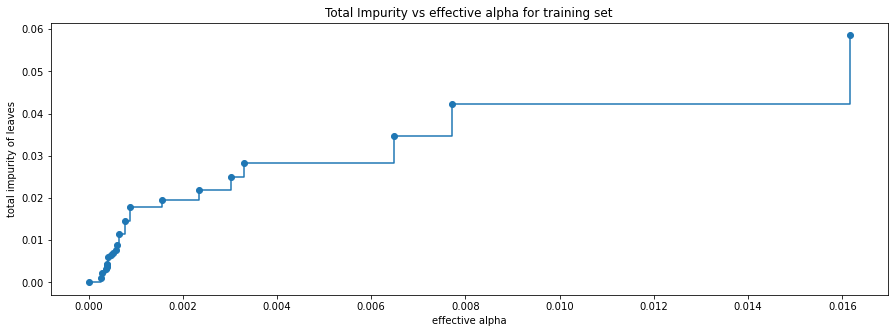

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [98]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


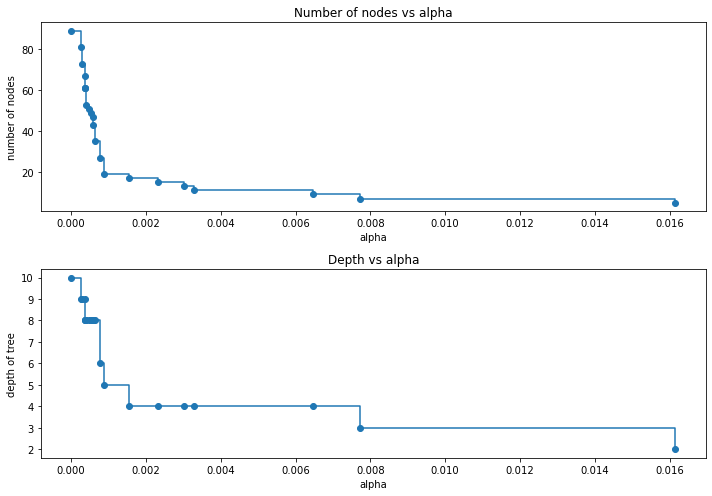

In [99]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

F1 Score vs alpha for training and testing sets
----------------------------------------------------

In [100]:
f1score_train = []
for clf in clfs:
    pred_train = clf.predict(XD_train)
    values_train = f1_score(yd_train, pred_train)
    f1score_train.append(values_train)

In [101]:
f1score_test = []
for clf in clfs:
    pred_test = clf.predict(XD_test)
    values_test = f1_score(yd_test, pred_test)
    f1score_test.append(values_test)

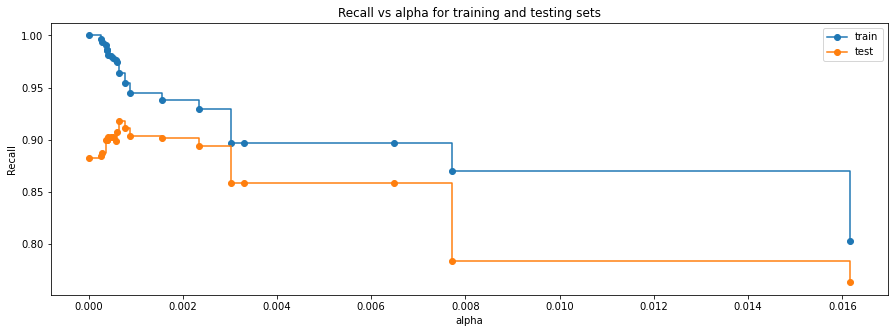

In [102]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1score_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1score_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
# creating the model where we get highest train and test f1score
index_best_model = np.argmax(f1score_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


In [104]:
decision_tree_postpruned_perf_train = model_performance(
    best_model, XD_train, yd_train
)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0  0.993143  0.963746   0.963746  0.963746

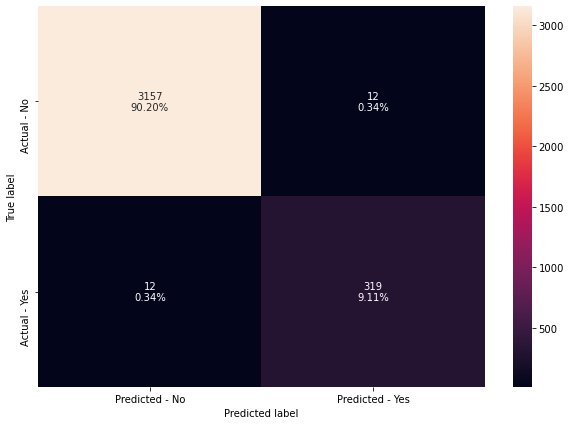

In [105]:
make_confusion_matrix(best_model, XD_train, yd_train)

In [106]:
decision_tree_postpruned_perf_test = model_performance(
    best_model, XD_test, yd_test
)
decision_tree_postpruned_perf_test

Accuracy   Recall  Precision        F1
0     0.984  0.90604   0.931034  0.918367

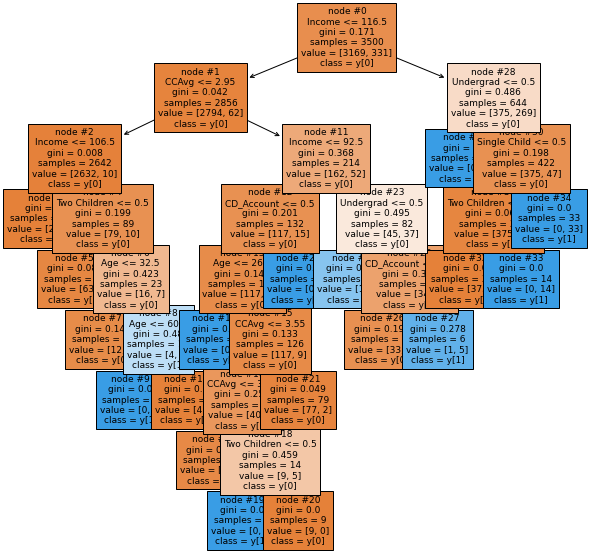

In [107]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [108]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Two Children <= 0.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Two Children >  0.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

In [109]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
Undergrad              0.429489
Income                 0.319013
Single Child           0.101040
Two Children           0.063812
CCAvg                  0.045185
CD_Account             0.024298
Age                    0.017163
Mortgage               0.000000
Securities_Account     0.000000
Online                 0.000000
CreditCard             0.000000
Couple                 0.000000
Single                 0.000000
Advanced/Professional  0.000000
Graduate               0.000000


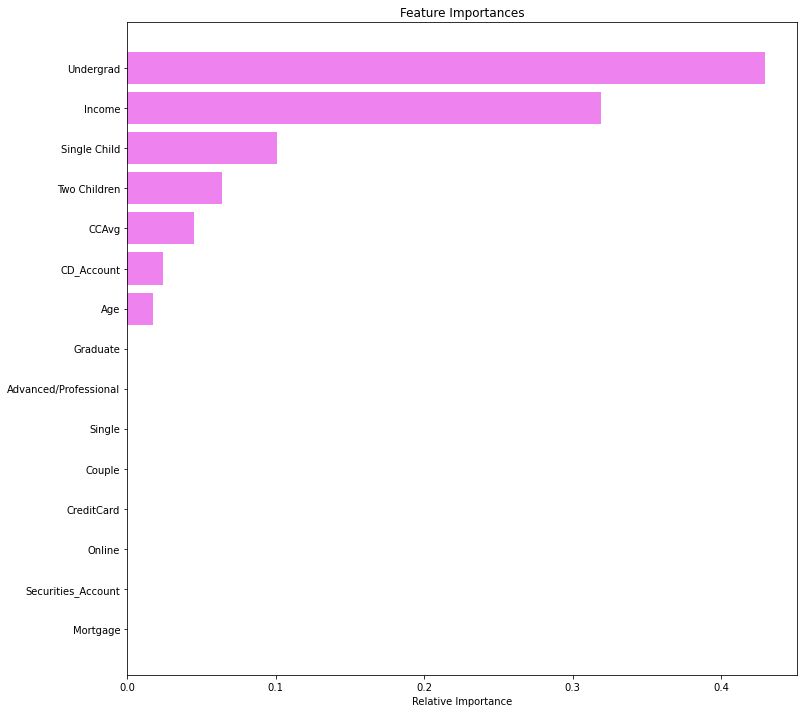

[0.01716306 0.31901255 0.04518537 0.         0.         0.02429818
 0.         0.         0.         0.         0.10103971 0.06381228
 0.         0.         0.42948885]


In [110]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

print(importances)

In [111]:
### Lets Compare all Decision Tree Models

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.976667                     0.981333   
Recall                  0.879195                     0.879195   
Precision               0.885135                     0.929078   
F1                      0.882155                     0.903448   

           Decision Tree (Post-Pruning)  
Accuracy                       0.984000  
Recall                         0.906040  
Precision                      0.931034  
F1                             0.918367

### Inferences on Model Performance Improvement for Decision Tree

1. We see that the Cost Complexity based Post Pruning Providing the best metrics of 98% accuracy, 90% Recall, 93% Precision and 92% F1 Score
2. With the Highest F1 Score of 0.918, this Model is selected as the recomended Model for Implementation with Alllife Bank
3. The Most Important Features are the Education, especially if the Person is an Undergraduate
4. Income of the Individual is the second most important feature with the best model
5. The Families with atleast 1 or more Child(3,4 membered families) are next important
6. CC Average and Certified Deposit Account of the Customer carry an importance score of 0.02 and 0.01 respectively


### Actionable Insights & Recommendation



In [112]:
### Lets Compare all Decision Tree Models

final_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,        
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
final_test_comp_df.columns = [
    "Logistic Regression-0.34 Threshold",
    "log_reg_model_test_perf_SFS - 0.34 Threshold",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
final_test_comp_df

Test set performance comparison:


Logistic Regression-0.34 Threshold  \
Accuracy                             0.960000   
Recall                               0.738255   
Precision                            0.839695   
F1                                   0.785714   

           log_reg_model_test_perf_SFS - 0.34 Threshold  \
Accuracy                                       0.953333   
Recall                                         0.691275   
Precision                                      0.811024   
F1                                             0.746377   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.981333                      0.984000  
Recall                        0.879195                      0.906040  
Precision                     0.929078                      0.931034  
F1                            0.903448                      0.918367

1. Comparing the 2 best performing Models of Logical Regression with Decision Tree, we see that the Decision Tree Outperforms the Logistic Regression in a hugeway
2. It is recomended that All-Life Bank use the Cost Complexity based Decision Tree for its implementation
3. AllStream should target Educated people with atleast a Graduate Degree or an Advanced Degree to be potential target customers
4. High Income professionals show an inclination towards Personal Loan Consumption as well and could be targetted
5. Married Persons with atleast 1 Kid(Families of size 3 or more) have a greater need for a Personal Loan and could be targetted



### Perform an Exploratory Data Analysis on the incorrectly predicted data


In [113]:
# Extracting the rows from original data frame lmdf where indexes are same as the training data
original_df = lmdf[lmdf.index.isin(XD.index.values)].copy()

# Extracting predicted values from the final model
original_df['Predicted'] = best_model.predict(XD)

# Find out the deviations in predicted values from the actual values for exploratory data analysis
delta_df = original_df[original_df['Predicted'] != original_df['Personal_Loan']]

# Let us find out the number of rows in the delta, it is less than 50 records(< 10% of Original Data)
delta_df.shape

(48, 15)

In [114]:
delta_df.head(48)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
12     48          23   114.0    93106       2   3.80          3       0.0   
261    42          16   111.0    93106       2   1.20          3     251.0   
323    59          34    99.0    90034       1   4.40          1       0.0   
402    54          28    93.0    91604       1   4.90          1     133.0   
464    43          19    83.0    94305       4   3.60          3       0.0   
505    36          12    69.0    94305       3   3.10          2       0.0   
702    35           9   109.0    92709       3   4.00          1       0.0   
792    41          16    98.0    93117       1   4.00          3       0.0   
1028   29           4   110.0    92096       4   2.50          3       0.0   
1062   47          21    83.0    92220       1   3.80          1      97.0   
1126   32           8   104.0    95192       2   3.70          1       0.0   
1176   29           3   103.0    90049       4   3.40          1       0.0   
1518   43          17    64.0    95053       4   3.00          3     221.0   
1570   41          16   114.0    94705       4   3.50          1       0.0   
1577   34           8    65.0    92093       1   3.00          1     227.0   
1793   35           9   113.0    94596       3   0.80          3       0.0   
2030   63          38   111.0    95814       2   3.90          1     207.0   
2136   50          26   115.0    95008       1   1.20          3       0.0   
2158   50          25    83.0    94720       4   3.10          1       0.0   
2285   48          22   114.0    92007       1   2.40          3       0.0   
2311   62          37   115.0    90245       4   3.40          2       0.0   
2336   34           8    99.0    93460       2   4.50          3     217.0   
2349   59          35    94.0    94610       1   4.30          1      76.0   
2361   36          12   109.0    94928       3   0.50          3       0.0   
2437   65          40   114.0    94608       4   3.40          2       0.0   
2470   33           7    81.0    92122       2   4.50          3     187.0   
2533   54          29   111.0    93023       1   1.10          2       0.0   
2544   58          34    90.0    95039       1   3.60          2       0.0   
2625   61          36   108.0    93943       4   3.40          2       0.0   
2665   35           9   105.0    90064       2   4.50          3       0.0   
2738   35           9   103.0    95120       2   4.50          3       0.0   
2874   49          25   114.0    91380       1   2.50          3       0.0   
3308   48          23   108.0    92120       2   3.80          3       0.0   
3318   46          20   105.0    90089       4   3.20          1       0.0   
3322   41          16   104.0    92008       1   4.00          3       0.0   
3349   55          25    95.0    92407       2   4.50          3     252.5   
3403   54          29    82.0    94709       3   3.70          2       0.0   
3851   46          21    99.0    90277       2   3.80          3     194.0   
4275   63          38   102.0    95616       4   3.40          2       0.0   
4350   64          39   101.0    95134       4   3.40          2       0.0   
4570   32           6    99.0    91902       2   4.50          3     249.0   
4571   58          28    95.0    94304       1   3.00          3       0.0   
4575   53          27   115.0    90095       2   0.50          3       0.0   
4583   52          26    83.0    92521       1   3.10          1       0.0   
4671   39          14   104.0    95035       1   4.00          3       0.0   
4702   35           5   108.0    90630       2   2.75          3       0.0   
4941   28           4   112.0    90049       2   1.60          2       0.0   
4963   32           6    98.0    95054       2   4.50          3     252.5   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
12                0                   1           0       0           0   
261               1              

In [115]:
# For Plotting Purposes, let us re-populate the key columns with meaningful values
replaceStruct={
     'Family' : {1:'Single',2:'Couple', 3: 'Single Child', 4: 'Two Children'},
     'Education' : {1: 'Undergrad', 2: 'Graduate' , 3: 'Advanced/Professional'},
     'Personal_Loan': {0:'No', 1:'Yes'},
     'Securities_Account': {0:'No', 1:'Yes'},
     'CD_Account': {0:'No', 1:'Yes'},
     'Online': {0:'No', 1:'Yes'},
     'CreditCard': {0:'No', 1:'Yes'},
     'Predicted': {0:'No', 1:'Yes'} }
delta_df = delta_df.replace(replaceStruct)

In [116]:
colsToplot = ['Age','Experience','Income','CCAvg','Mortgage','Family','Education','Personal_Loan','Predicted','Securities_Account','CD_Account','Online','CreditCard']


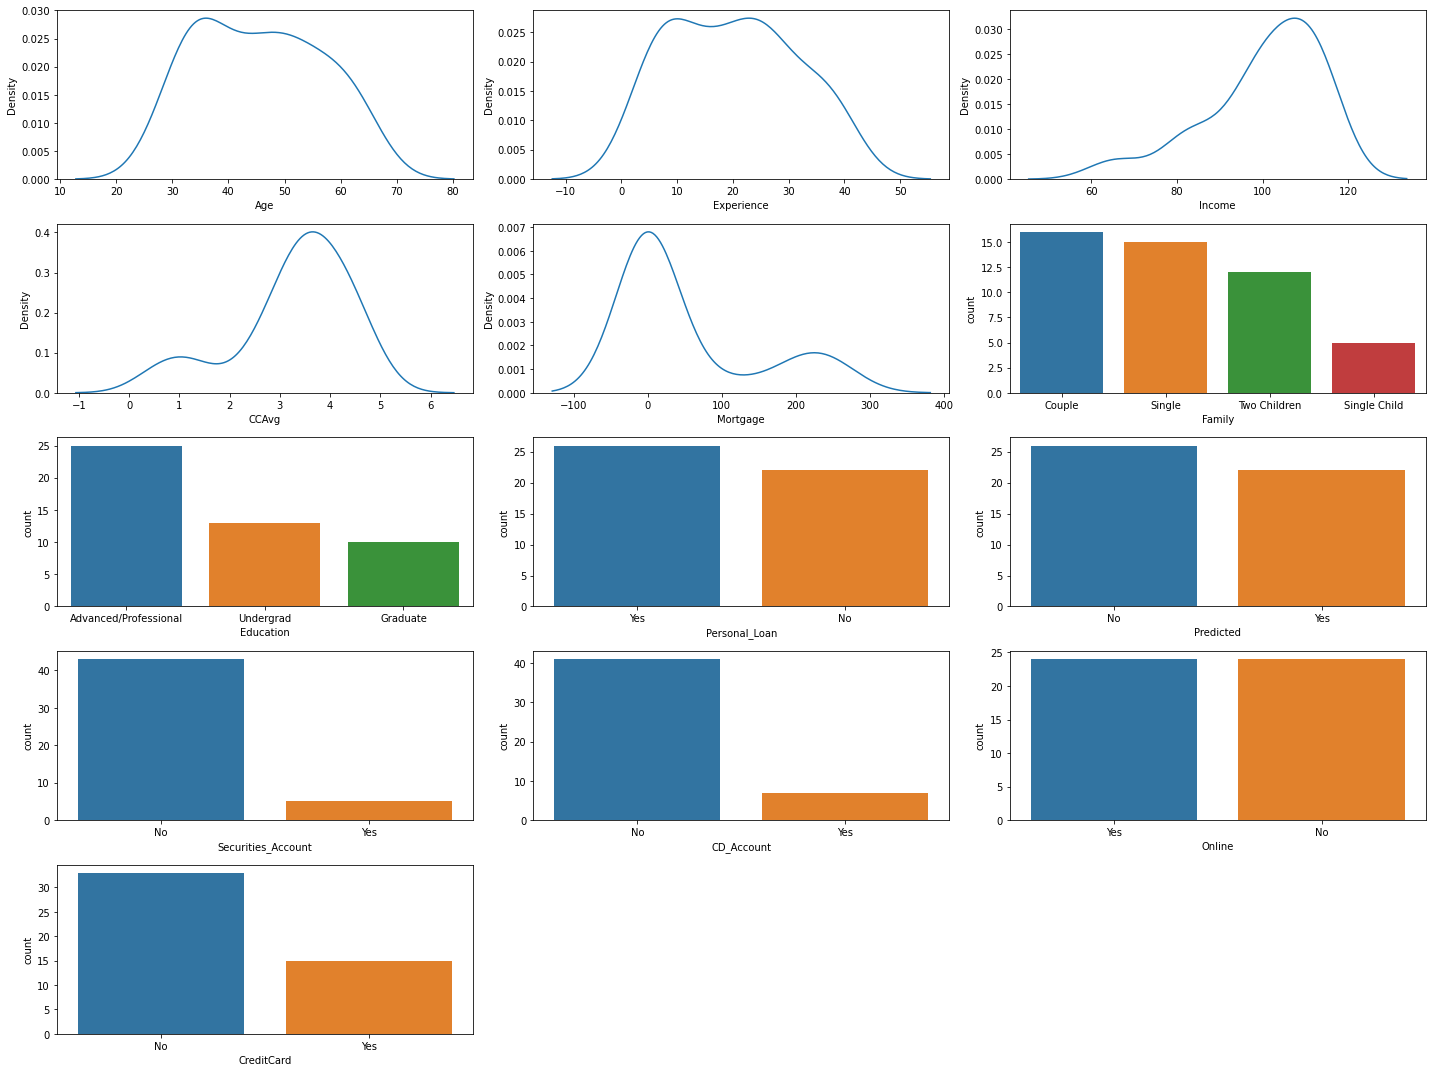

In [117]:
# Lets look at each of the individual data elements
fig, axs = plt.subplots(5,3,figsize=(20,15))
i=0;
j=0;
start = 0;
kdeplotCols = ['Age','Experience','Income','CCAvg','Mortgage']

for colToPlot in colsToplot:
    if colToPlot in kdeplotCols:
        sns.kdeplot(data=delta_df,x=colToPlot,ax=axs[i][j])
    else:
        sns.countplot(data=delta_df,order=delta_df[colToPlot].value_counts().index, x=colToPlot,ax=axs[i][j])
    start = start+1;
    if j < 2:
        j = j+1
    elif j > 1:
        i = i+1
        j = 0
 
for counter in range(start,15):
    fig.delaxes(axs.flatten()[counter])        
plt.tight_layout()

### Initial Impressions

1. The Predicted and Personal Loan values have flipped, but the flipping has happened on columns that are highly correlated
2. Family & Education data for Predicted Values should have been 1 going by correlation
3. Let's explore the values of CCAvg and Income 

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

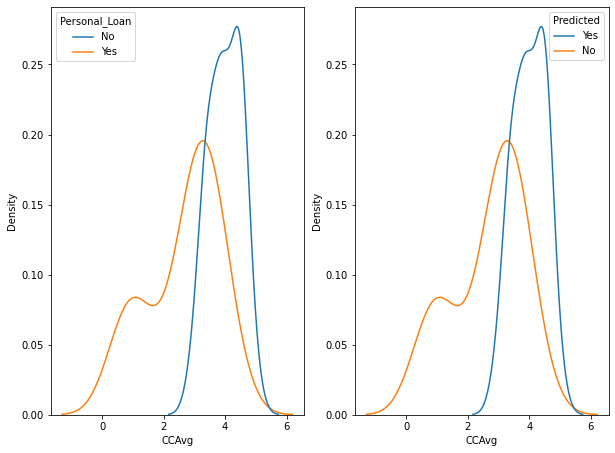

In [118]:
# First Lets look at CCAvg as a Decision Factor between Actual vs Predicted
fig, axs = plt.subplots(1,2,figsize=(10,7.5))

sns.kdeplot( x='CCAvg',hue='Personal_Loan',data=delta_df,ax=axs[0])
sns.kdeplot( x='CCAvg',hue='Predicted',data=delta_df,ax=axs[1])


<AxesSubplot:xlabel='Income', ylabel='Density'>

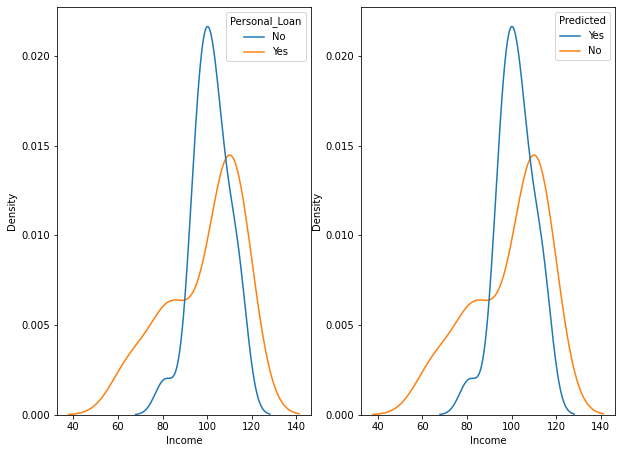

In [119]:
# Lets explore Income as a Factor between Actual vs Predicted
fig, axs = plt.subplots(1,2,figsize=(10,7.5))

sns.kdeplot( x='Income',hue='Personal_Loan',data=delta_df,ax=axs[0])
sns.kdeplot( x='Income',hue='Predicted',data=delta_df,ax=axs[1])

Predicted     No  Yes  All
Family                    
All           26   22   48
Couple         5   11   16
Single         9    6   15
Two Children   7    5   12
Single Child   5    0    5
------------------------------------------------------------------------------------------------------------------------


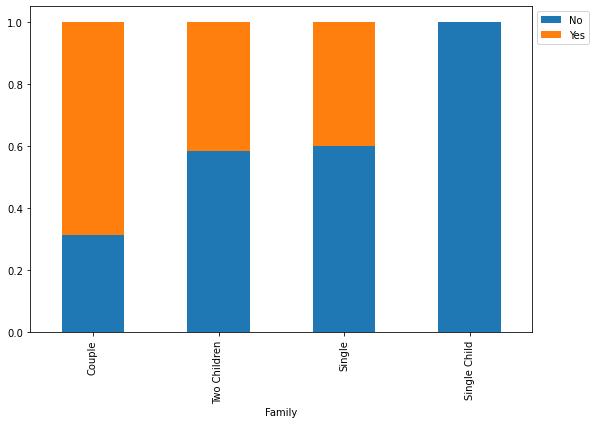

In [120]:
# The Next highest correlated fields are in Family and Education
stacked_barplot(delta_df, "Family", "Predicted")

Personal_Loan  No  Yes  All
Family                     
All            22   26   48
Couple         11    5   16
Single          6    9   15
Two Children    5    7   12
Single Child    0    5    5
------------------------------------------------------------------------------------------------------------------------


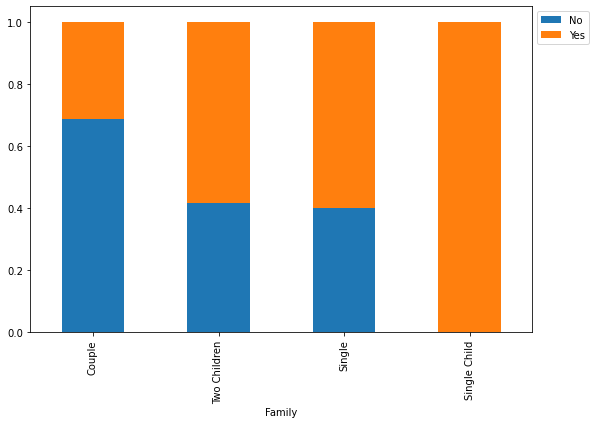

In [121]:
stacked_barplot(delta_df, "Family", "Personal_Loan")

Predicted              No  Yes  All
Education                          
All                    26   22   48
Advanced/Professional  11   14   25
Graduate                5    5   10
Undergrad              10    3   13
------------------------------------------------------------------------------------------------------------------------


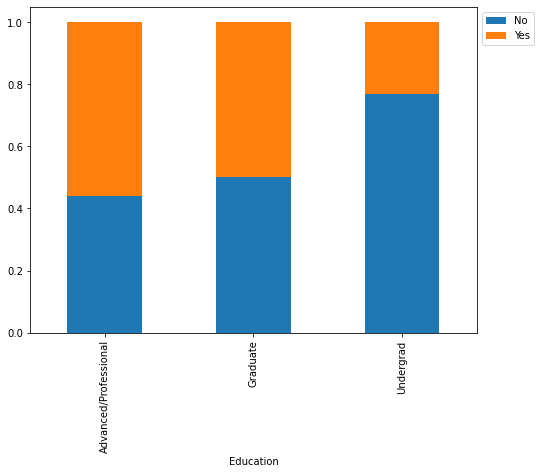

In [122]:
# After Family, Education is listed as the key flipping column
stacked_barplot(delta_df, "Education", "Predicted")

Personal_Loan          No  Yes  All
Education                          
All                    22   26   48
Advanced/Professional  14   11   25
Graduate                5    5   10
Undergrad               3   10   13
------------------------------------------------------------------------------------------------------------------------


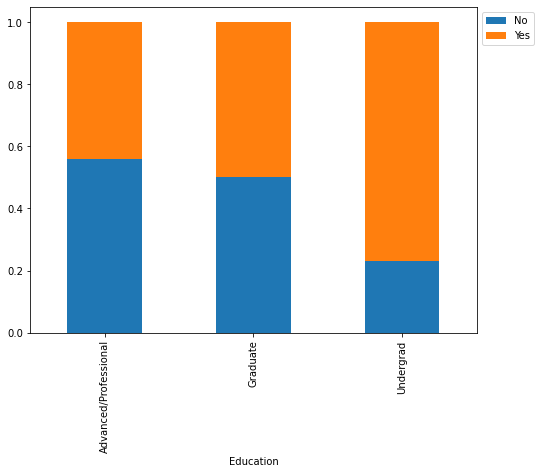

In [123]:
stacked_barplot(delta_df, "Education", "Personal_Loan")

Predicted   No  Yes  All
CD_Account              
All         26   22   48
No          25   16   41
Yes          1    6    7
------------------------------------------------------------------------------------------------------------------------


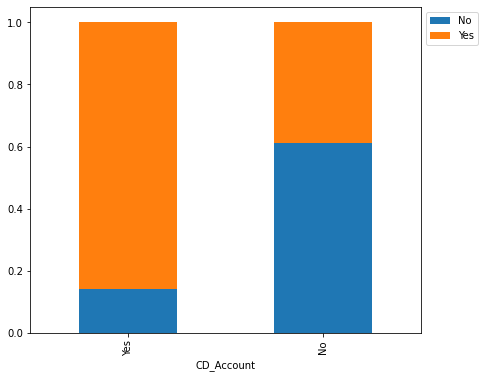

In [124]:
stacked_barplot(delta_df, "CD_Account", "Predicted")

Personal_Loan  No  Yes  All
CD_Account                 
All            22   26   48
No             16   25   41
Yes             6    1    7
------------------------------------------------------------------------------------------------------------------------


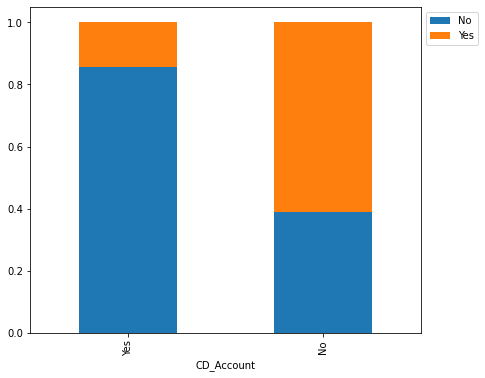

In [127]:
stacked_barplot(delta_df, "CD_Account", "Personal_Loan")

### Exploratory Data Analysis

The reasons for the variations could be found in the interpretations of the Decision Tree for Best Model,

1. We see that the Income between 106.5 and 16.5 but with CCAvg less than 2.65 and Families with 2 members have been marked as No
2. Also, when the Income is less than 106.5, but with a CCAvg greater than 2.65, We see that the Individual Undergrads with a Depository Account have been marked as Personal Loan Yes
3. The Prediction trends have followed the decision tree based Primarily on the 2 Pivot Columns of Income and CCAvg in the wrongly predicted data

### Business Insights/Recomendations

The Conclusive findings could be written by inferring the best_model arrived through the decision tree. Which provides an almost 90% F1 Score,

1. Customers who make atleast 106.5K but less than 116.5K, with less than 2.95K CC Avg, but have  with 2 Children and aged between 32.5 and 60 might have a Personal Loan need
2. Customers with Income less than or equal to 92.5K, but with a CCAvg > 2.95K with out a Certificate of Deposit Account and aged less than or equal to 26.5 might need a Personal Loan
3. Customers with Income less than or equal to 92.5K, but with a CCAvg > 3.35K with out a Certificate of Deposit Account and aged greater than 26.5 but with a Fmaily size of 2-3 might need a Personal Loan 
4. Undergrad Customers with Income less than or equal to 92.5K with CCAvg > 2.95 and with a Certificate of Deposit Account could be a Personal Loan target
5. Customers with atleast Graduation and Income between 92.5 - 116.50, with CCAvg > 2.95 might be Personal Loan Customers
6. Customers with Income greater than 116.5 and atleast Graduation will need a Personal Loan
7. Customers with Income greater than 116.5, undergraduates with 1 or more children will need Personal Loan


In [130]:
!jupyter nbconvert --to html PersonalLoan_Campaign_v0.4

[NbConvertApp] Converting notebook PersonalLoan_Campaign_v0.4.ipynb to html
[NbConvertApp] Writing 6090385 bytes to PersonalLoan_Campaign_v0.4.html
